In [1]:
%matplotlib inline
import numpy as np
import pandas as pd
from scipy import stats
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
# Importing Classifier Modules
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC, LinearSVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import Perceptron
from sklearn.linear_model import SGDClassifier
from sklearn.ensemble import GradientBoostingClassifier

pd.set_option('display.max_rows', 200)
pd.set_option('display.max_columns', 200)

In [2]:
import platform; print(platform.platform())
import sys; print("Python", sys.version)
import numpy; print("NumPy", numpy.version.version)
import scipy; print("SciPy", scipy.version.version)
import sklearn; print("Scikit-Learn", sklearn.__version__)

Darwin-19.3.0-x86_64-i386-64bit
Python 3.7.3 (default, Mar 27 2019, 16:54:48) 
[Clang 4.0.1 (tags/RELEASE_401/final)]
NumPy 1.16.5
SciPy 1.3.1
Scikit-Learn 0.22.2.post1


In [3]:
df = pd.read_csv('training_v2.csv')
print(df.shape)
df.head()

(91713, 186)


,encounter_id,patient_id,hospital_id,hospital_death,age,bmi,elective_surgery,ethnicity,gender,height,hospital_admit_source,icu_admit_source,icu_id,icu_stay_type,icu_type,pre_icu_los_days,readmission_status,weight,albumin_apache,apache_2_diagnosis,apache_3j_diagnosis,apache_post_operative,arf_apache,bilirubin_apache,bun_apache,creatinine_apache,fio2_apache,gcs_eyes_apache,gcs_motor_apache,gcs_unable_apache,gcs_verbal_apache,glucose_apache,heart_rate_apache,hematocrit_apache,intubated_apache,map_apache,paco2_apache,paco2_for_ph_apache,pao2_apache,ph_apache,resprate_apache,sodium_apache,temp_apache,urineoutput_apache,ventilated_apache,wbc_apache,d1_diasbp_invasive_max,d1_diasbp_invasive_min,d1_diasbp_max,d1_diasbp_min,d1_diasbp_noninvasive_max,d1_diasbp_noninvasive_min,d1_heartrate_max,d1_heartrate_min,d1_mbp_invasive_max,d1_mbp_invasive_min,d1_mbp_max,d1_mbp_min,d1_mbp_noninvasive_max,d1_mbp_noninvasive_min,d1_resprate_max,d1_resprate_min,d1_spo2_max,d1_spo2_min,d1_sysbp_invasive_max,d1_sysbp_invasive_min,d1_sysbp_max,d1_sysbp_min,d1_sysbp_noninvasive_max,d1_sysbp_noninvasive_min,d1_temp_max,d1_temp_min,h1_diasbp_invasive_max,h1_diasbp_invasive_min,h1_diasbp_max,h1_diasbp_min,h1_diasbp_noninvasive_max,h1_diasbp_noninvasive_min,h1_heartrate_max,h1_heartrate_min,h1_mbp_invasive_max,h1_mbp_invasive_min,h1_mbp_max,h1_mbp_min,h1_mbp_noninvasive_max,h1_mbp_noninvasive_min,h1_resprate_max,h1_resprate_min,h1_spo2_max,h1_spo2_min,h1_sysbp_invasive_max,h1_sysbp_invasive_min,h1_sysbp_max,h1_sysbp_min,h1_sysbp_noninvasive_max,h1_sysbp_noninvasive_min,h1_temp_max,h1_temp_min,d1_albumin_max,d1_albumin_min,d1_bilirubin_max,d1_bilirubin_min,d1_bun_max,d1_bun_min,d1_calcium_max,d1_calcium_min,d1_creatinine_max,d1_creatinine_min,d1_glucose_max,d1_glucose_min,d1_hco3_max,d1_hco3_min,d1_hemaglobin_max,d1_hemaglobin_min,d1_hematocrit_max,d1_hematocrit_min,d1_inr_max,d1_inr_min,d1_lactate_max,d1_lactate_min,d1_platelets_max,d1_platelets_min,d1_potassium_max,d1_potassium_min,d1_sodium_max,d1_sodium_min,d1_wbc_max,d1_wbc_min,h1_albumin_max,h1_albumin_min,h1_bilirubin_max,h1_bilirubin_min,h1_bun_max,h1_bun_min,h1_calcium_max,h1_calcium_min,h1_creatinine_max,h1_creatinine_min,h1_glucose_max,h1_glucose_min,h1_hco3_max,h1_hco3_min,h1_hemaglobin_max,h1_hemaglobin_min,h1_hematocrit_max,h1_hematocrit_min,h1_inr_max,h1_inr_min,h1_lactate_max,h1_lactate_min,h1_platelets_max,h1_platelets_min,h1_potassium_max,h1_potassium_min,h1_sodium_max,h1_sodium_min,h1_wbc_max,h1_wbc_min,d1_arterial_pco2_max,d1_arterial_pco2_min,d1_arterial_ph_max,d1_arterial_ph_min,d1_arterial_po2_max,d1_arterial_po2_min,d1_pao2fio2ratio_max,d1_pao2fio2ratio_min,h1_arterial_pco2_max,h1_arterial_pco2_min,h1_arterial_ph_max,h1_arterial_ph_min,h1_arterial_po2_max,h1_arterial_po2_min,h1_pao2fio2ratio_max,h1_pao2fio2ratio_min,apache_4a_hospital_death_prob,apache_4a_icu_death_prob,aids,cirrhosis,diabetes_mellitus,hepatic_failure,immunosuppression,leukemia,lymphoma,solid_tumor_with_metastasis,apache_3j_bodysystem,apache_2_bodysystem
0,66154,25312,118,0,68.0,22.73,0,Caucasian,M,180.3,Floor,Floor,92,admit,CTICU,0.541667,0,73.9,2.3,113.0,502.01,0,0.0,0.4,31.0,2.51,NaN,3.0,6.0,0.0,4.0,168.0,118.0,27.4,0.0,40.0,NaN,NaN,NaN,NaN,36.0,134.0,39.3,NaN,0.0,14.1,46.0,32.0,68.0,37.0,68.0,37.0,119.0,72.0,66.0,40.0,89.0,46.0,89.0,46.0,34.0,10.0,100.0,74.0,122.0,64.0,131.0,73.0,131.0,73.0,39.9,37.2,NaN,NaN,68.0,63.0,68.0,63.0,119.0,108.0,NaN,NaN,86.0,85.0,86.0,85.0,26.0,18.0,100.0,74.0,NaN,NaN,131.0,115.0,131.0,115.0,39.5,37.5,2.3,2.3,0.4,0.4,31.0,30.0,8.5,7.4,2.51,2.23,168.0,109.0,19.0,15.0,8.9,8.9,27.4,27.4,NaN,NaN,1.3,1.0,233.0,233.0,4.0,3.4,136.0,134.0,14.1,14.1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.10,0.05,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,Sepsis,Cardiovascular
1,114252,59342,81,0,77.0,27.42,0,Caucasian,F,160.0,Floor,Floor,90,admit,Med-Surg ICU,0.927778,0,70.2,NaN,1

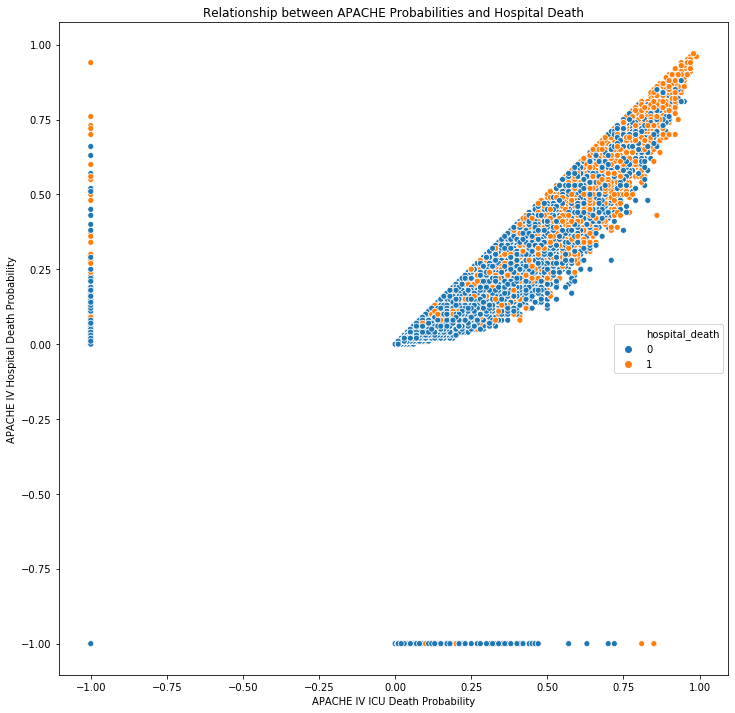

In [5]:
fig, ax = plt.subplots(figsize=(12,12))
sns_plot = sns.scatterplot(df.apache_4a_hospital_death_prob, df.apache_4a_icu_death_prob, hue = df.hospital_death)
plt.title('Relationship between APACHE Probabilities and Hospital Death')
plt.xlabel('APACHE IV ICU Death Probability')
plt.ylabel('APACHE IV Hospital Death Probability')
fig = sns_plot.get_figure()
fig.savefig("scatter.png")

In [45]:
df.describe(include='all')

,encounter_id,patient_id,hospital_id,hospital_death,age,bmi,elective_surgery,ethnicity,gender,height,hospital_admit_source,icu_admit_source,icu_id,icu_stay_type,icu_type,pre_icu_los_days,readmission_status,weight,albumin_apache,apache_2_diagnosis,apache_3j_diagnosis,apache_post_operative,arf_apache,bilirubin_apache,bun_apache,creatinine_apache,fio2_apache,gcs_eyes_apache,gcs_motor_apache,gcs_unable_apache,gcs_verbal_apache,glucose_apache,heart_rate_apache,hematocrit_apache,intubated_apache,map_apache,paco2_apache,paco2_for_ph_apache,pao2_apache,ph_apache,resprate_apache,sodium_apache,temp_apache,urineoutput_apache,ventilated_apache,wbc_apache,d1_diasbp_invasive_max,d1_diasbp_invasive_min,d1_diasbp_max,d1_diasbp_min,d1_diasbp_noninvasive_max,d1_diasbp_noninvasive_min,d1_heartrate_max,d1_heartrate_min,d1_mbp_invasive_max,d1_mbp_invasive_min,d1_mbp_max,d1_mbp_min,d1_mbp_noninvasive_max,d1_mbp_noninvasive_min,d1_resprate_max,d1_resprate_min,d1_spo2_max,d1_spo2_min,d1_sysbp_invasive_max,d1_sysbp_invasive_min,d1_sysbp_max,d1_sysbp_min,d1_sysbp_noninvasive_max,d1_sysbp_noninvasive_min,d1_temp_max,d1_temp_min,h1_diasbp_invasive_max,h1_diasbp_invasive_min,h1_diasbp_max,h1_diasbp_min,h1_diasbp_noninvasive_max,h1_diasbp_noninvasive_min,h1_heartrate_max,h1_heartrate_min,h1_mbp_invasive_max,h1_mbp_invasive_min,h1_mbp_max,h1_mbp_min,h1_mbp_noninvasive_max,h1_mbp_noninvasive_min,h1_resprate_max,h1_resprate_min,h1_spo2_max,h1_spo2_min,h1_sysbp_invasive_max,h1_sysbp_invasive_min,h1_sysbp_max,h1_sysbp_min,h1_sysbp_noninvasive_max,h1_sysbp_noninvasive_min,h1_temp_max,h1_temp_min,d1_albumin_max,d1_albumin_min,d1_bilirubin_max,d1_bilirubin_min,d1_bun_max,d1_bun_min,d1_calcium_max,d1_calcium_min,d1_creatinine_max,d1_creatinine_min,d1_glucose_max,d1_glucose_min,d1_hco3_max,d1_hco3_min,d1_hemaglobin_max,d1_hemaglobin_min,d1_hematocrit_max,d1_hematocrit_min,d1_inr_max,d1_inr_min,d1_lactate_max,d1_lactate_min,d1_platelets_max,d1_platelets_min,d1_potassium_max,d1_potassium_min,d1_sodium_max,d1_sodium_min,d1_wbc_max,d1_wbc_min,h1_albumin_max,h1_albumin_min,h1_bilirubin_max,h1_bilirubin_min,h1_bun_max,h1_bun_min,h1_calcium_max,h1_calcium_min,h1_creatinine_max,h1_creatinine_min,h1_glucose_max,h1_glucose_min,h1_hco3_max,h1_hco3_min,h1_hemaglobin_max,h1_hemaglobin_min,h1_hematocrit_max,h1_hematocrit_min,h1_inr_max,h1_inr_min,h1_lactate_max,h1_lactate_min,h1_platelets_max,h1_platelets_min,h1_potassium_max,h1_potassium_min,h1_sodium_max,h1_sodium_min,h1_wbc_max,h1_wbc_min,d1_arterial_pco2_max,d1_arterial_pco2_min,d1_arterial_ph_max,d1_arterial_ph_min,d1_arterial_po2_max,d1_arterial_po2_min,d1_pao2fio2ratio_max,d1_pao2fio2ratio_min,h1_arterial_pco2_max,h1_arterial_pco2_min,h1_arterial_ph_max,h1_arterial_ph_min,h1_arterial_po2_max,h1_arterial_po2_min,h1_pao2fio2ratio_max,h1_pao2fio2ratio_min,apache_4a_hospital_death_prob,apache_4a_icu_death_prob,aids,cirrhosis,diabetes_mellitus,hepatic_failure,immunosuppression,leukemia,lymphoma,solid_tumor_with_metastasis,apache_3j_bodysystem,apache_2_bodysystem
count,91713.000000,91713.000000,91713.000000,91713.000000,87485.000000,88284.000000,91713.000000,90318,91688,90379.000000,70304,91601,91713.000000,91713,91713,91713.000000,91713.0,88993.000000,37334.000000,90051.000000,90612.000000,91713.000000,90998.000000,33579.000000,72451.00000,72860.000000,20845.000000,89812.000000,89812.000000,90676.000000,89812.000000,80677.000000,90835.000000,71835.000000,90998.000000,90719.000000,20845.000000,20845.000000,20845.000000,20845.000000,90479.000000,73113.000000,87605.000000,42715.000000,90998.000000,69701.000000,23729.000000,23729.000000,91548.000000,91548.000000,90673.000000,90673.000000,91568.000000,91568.000000,23936.000000,23936.000000,91493.000000,91493.000000,90234.000000,90234.000000,91328.000000,91328.000000,91380.000000,91380.000000,23754.000000,23754.000000,91554.000000,91554.00000,90686.000000,90686.000000,89389.000000,89389.000000,16785.000000,16785.000000,88094.000000,88094.000000,84363.000000,84363.000000,88923.000000,

In [46]:
def null_values(df):
        mis_val = df.isnull().sum()
        mis_val_percent = 100 * df.isnull().sum() / len(df)
        mis_val_table = pd.concat([mis_val, mis_val_percent], axis=1)
        mis_val_table_ren_columns = mis_val_table.rename(
        columns = {0 : 'Missing Values', 1 : '% of Total Values'})
        mis_val_table_ren_columns = mis_val_table_ren_columns[
            mis_val_table_ren_columns.iloc[:,1] != 0].sort_values(
        '% of Total Values', ascending=False).round(1)
        print ("Dataframe has " + str(df.shape[1]) + " columns.\n"      
            "There are " + str(mis_val_table_ren_columns.shape[0]) +
              " columns that have missing values.")
        return mis_val_table_ren_columns

In [5]:
null_values(df)

Dataframe has 186 columns.
There are 175 columns that have missing values.


,Missing Values,% of Total Values
h1_bilirubin_max,84619,92.3
h1_bilirubin_min,84619,92.3
h1_lactate_min,84369,92.0
h1_lactate_max,84369,92.0
h1_albumin_max,83824,91.4
h1_albumin_min,83824,91.4
h1_pao2fio2ratio_min,80195,87.4
h1_pao2fio2ratio_max,80195,87.4
h1_arterial_ph_min,76424,83.3
h1_arterial_ph_max,76424,83.3


In [81]:
list(set(df.dtypes.tolist()))

[dtype('int64'), dtype('O'), dtype('float64')]

In [6]:
df_num = df.select_dtypes(include = ['float64', 'int64'])
df_num.head()

,encounter_id,patient_id,hospital_id,hospital_death,age,bmi,elective_surgery,height,icu_id,pre_icu_los_days,readmission_status,weight,albumin_apache,apache_2_diagnosis,apache_3j_diagnosis,apache_post_operative,arf_apache,bilirubin_apache,bun_apache,creatinine_apache,fio2_apache,gcs_eyes_apache,gcs_motor_apache,gcs_unable_apache,gcs_verbal_apache,glucose_apache,heart_rate_apache,hematocrit_apache,intubated_apache,map_apache,paco2_apache,paco2_for_ph_apache,pao2_apache,ph_apache,resprate_apache,sodium_apache,temp_apache,urineoutput_apache,ventilated_apache,wbc_apache,d1_diasbp_invasive_max,d1_diasbp_invasive_min,d1_diasbp_max,d1_diasbp_min,d1_diasbp_noninvasive_max,d1_diasbp_noninvasive_min,d1_heartrate_max,d1_heartrate_min,d1_mbp_invasive_max,d1_mbp_invasive_min,d1_mbp_max,d1_mbp_min,d1_mbp_noninvasive_max,d1_mbp_noninvasive_min,d1_resprate_max,d1_resprate_min,d1_spo2_max,d1_spo2_min,d1_sysbp_invasive_max,d1_sysbp_invasive_min,d1_sysbp_max,d1_sysbp_min,d1_sysbp_noninvasive_max,d1_sysbp_noninvasive_min,d1_temp_max,d1_temp_min,h1_diasbp_invasive_max,h1_diasbp_invasive_min,h1_diasbp_max,h1_diasbp_min,h1_diasbp_noninvasive_max,h1_diasbp_noninvasive_min,h1_heartrate_max,h1_heartrate_min,h1_mbp_invasive_max,h1_mbp_invasive_min,h1_mbp_max,h1_mbp_min,h1_mbp_noninvasive_max,h1_mbp_noninvasive_min,h1_resprate_max,h1_resprate_min,h1_spo2_max,h1_spo2_min,h1_sysbp_invasive_max,h1_sysbp_invasive_min,h1_sysbp_max,h1_sysbp_min,h1_sysbp_noninvasive_max,h1_sysbp_noninvasive_min,h1_temp_max,h1_temp_min,d1_albumin_max,d1_albumin_min,d1_bilirubin_max,d1_bilirubin_min,d1_bun_max,d1_bun_min,d1_calcium_max,d1_calcium_min,d1_creatinine_max,d1_creatinine_min,d1_glucose_max,d1_glucose_min,d1_hco3_max,d1_hco3_min,d1_hemaglobin_max,d1_hemaglobin_min,d1_hematocrit_max,d1_hematocrit_min,d1_inr_max,d1_inr_min,d1_lactate_max,d1_lactate_min,d1_platelets_max,d1_platelets_min,d1_potassium_max,d1_potassium_min,d1_sodium_max,d1_sodium_min,d1_wbc_max,d1_wbc_min,h1_albumin_max,h1_albumin_min,h1_bilirubin_max,h1_bilirubin_min,h1_bun_max,h1_bun_min,h1_calcium_max,h1_calcium_min,h1_creatinine_max,h1_creatinine_min,h1_glucose_max,h1_glucose_min,h1_hco3_max,h1_hco3_min,h1_hemaglobin_max,h1_hemaglobin_min,h1_hematocrit_max,h1_hematocrit_min,h1_inr_max,h1_inr_min,h1_lactate_max,h1_lactate_min,h1_platelets_max,h1_platelets_min,h1_potassium_max,h1_potassium_min,h1_sodium_max,h1_sodium_min,h1_wbc_max,h1_wbc_min,d1_arterial_pco2_max,d1_arterial_pco2_min,d1_arterial_ph_max,d1_arterial_ph_min,d1_arterial_po2_max,d1_arterial_po2_min,d1_pao2fio2ratio_max,d1_pao2fio2ratio_min,h1_arterial_pco2_max,h1_arterial_pco2_min,h1_arterial_ph_max,h1_arterial_ph_min,h1_arterial_po2_max,h1_arterial_po2_min,h1_pao2fio2ratio_max,h1_pao2fio2ratio_min,apache_4a_hospital_death_prob,apache_4a_icu_death_prob,aids,cirrhosis,diabetes_mellitus,hepatic_failure,immunosuppression,leukemia,lymphoma,solid_tumor_with_metastasis
0,66154,25312,118,0,68.0,22.73,0,180.3,92,0.541667,0,73.9,2.3,113.0,502.01,0,0.0,0.4,31.0,2.51,NaN,3.0,6.0,0.0,4.0,168.0,118.0,27.4,0.0,40.0,NaN,NaN,NaN,NaN,36.0,134.0,39.3,NaN,0.0,14.1,46.0,32.0,68.0,37.0,68.0,37.0,119.0,72.0,66.0,40.0,89.0,46.0,89.0,46.0,34.0,10.0,100.0,74.0,122.0,64.0,131.0,73.0,131.0,73.0,39.9,37.2,NaN,NaN,68.0,63.0,68.0,63.0,119.0,108.0,NaN,NaN,86.0,85.0,86.0,85.0,26.0,18.0,100.0,74.0,NaN,NaN,131.0,115.0,131.0,115.0,39.5,37.5,2.3,2.3,0.4,0.4,31.0,30.0,8.5,7.4,2.51,2.23,168.0,109.0,19.0,15.0,8.9,8.9,27.4,27.4,NaN,NaN,1.3,1.0,233.0,233.0,4.0,3.4,136.0,134.0,14.1,14.1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.10,0.05,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
1,114252,59342,81,0,77.0,27.42,0,160.0,90,0.927778,0,70.2,NaN,108.0,203.01,0,0.0,NaN,9.0,0.56,1.0,1.0,3.0,0.0,1.0,145.0,120.0,36.9,0.0,46.0,37.0,37.0,51.0,7.45,33.0,145.0,35.1,NaN,1.0,12.7,NaN,NaN,95.0,31.0,95.0,31.0,118.0,72.0,NaN,NaN,120.0,38.0,120.0,38.0,32.0,12.0,100.0,70.0,NaN,N

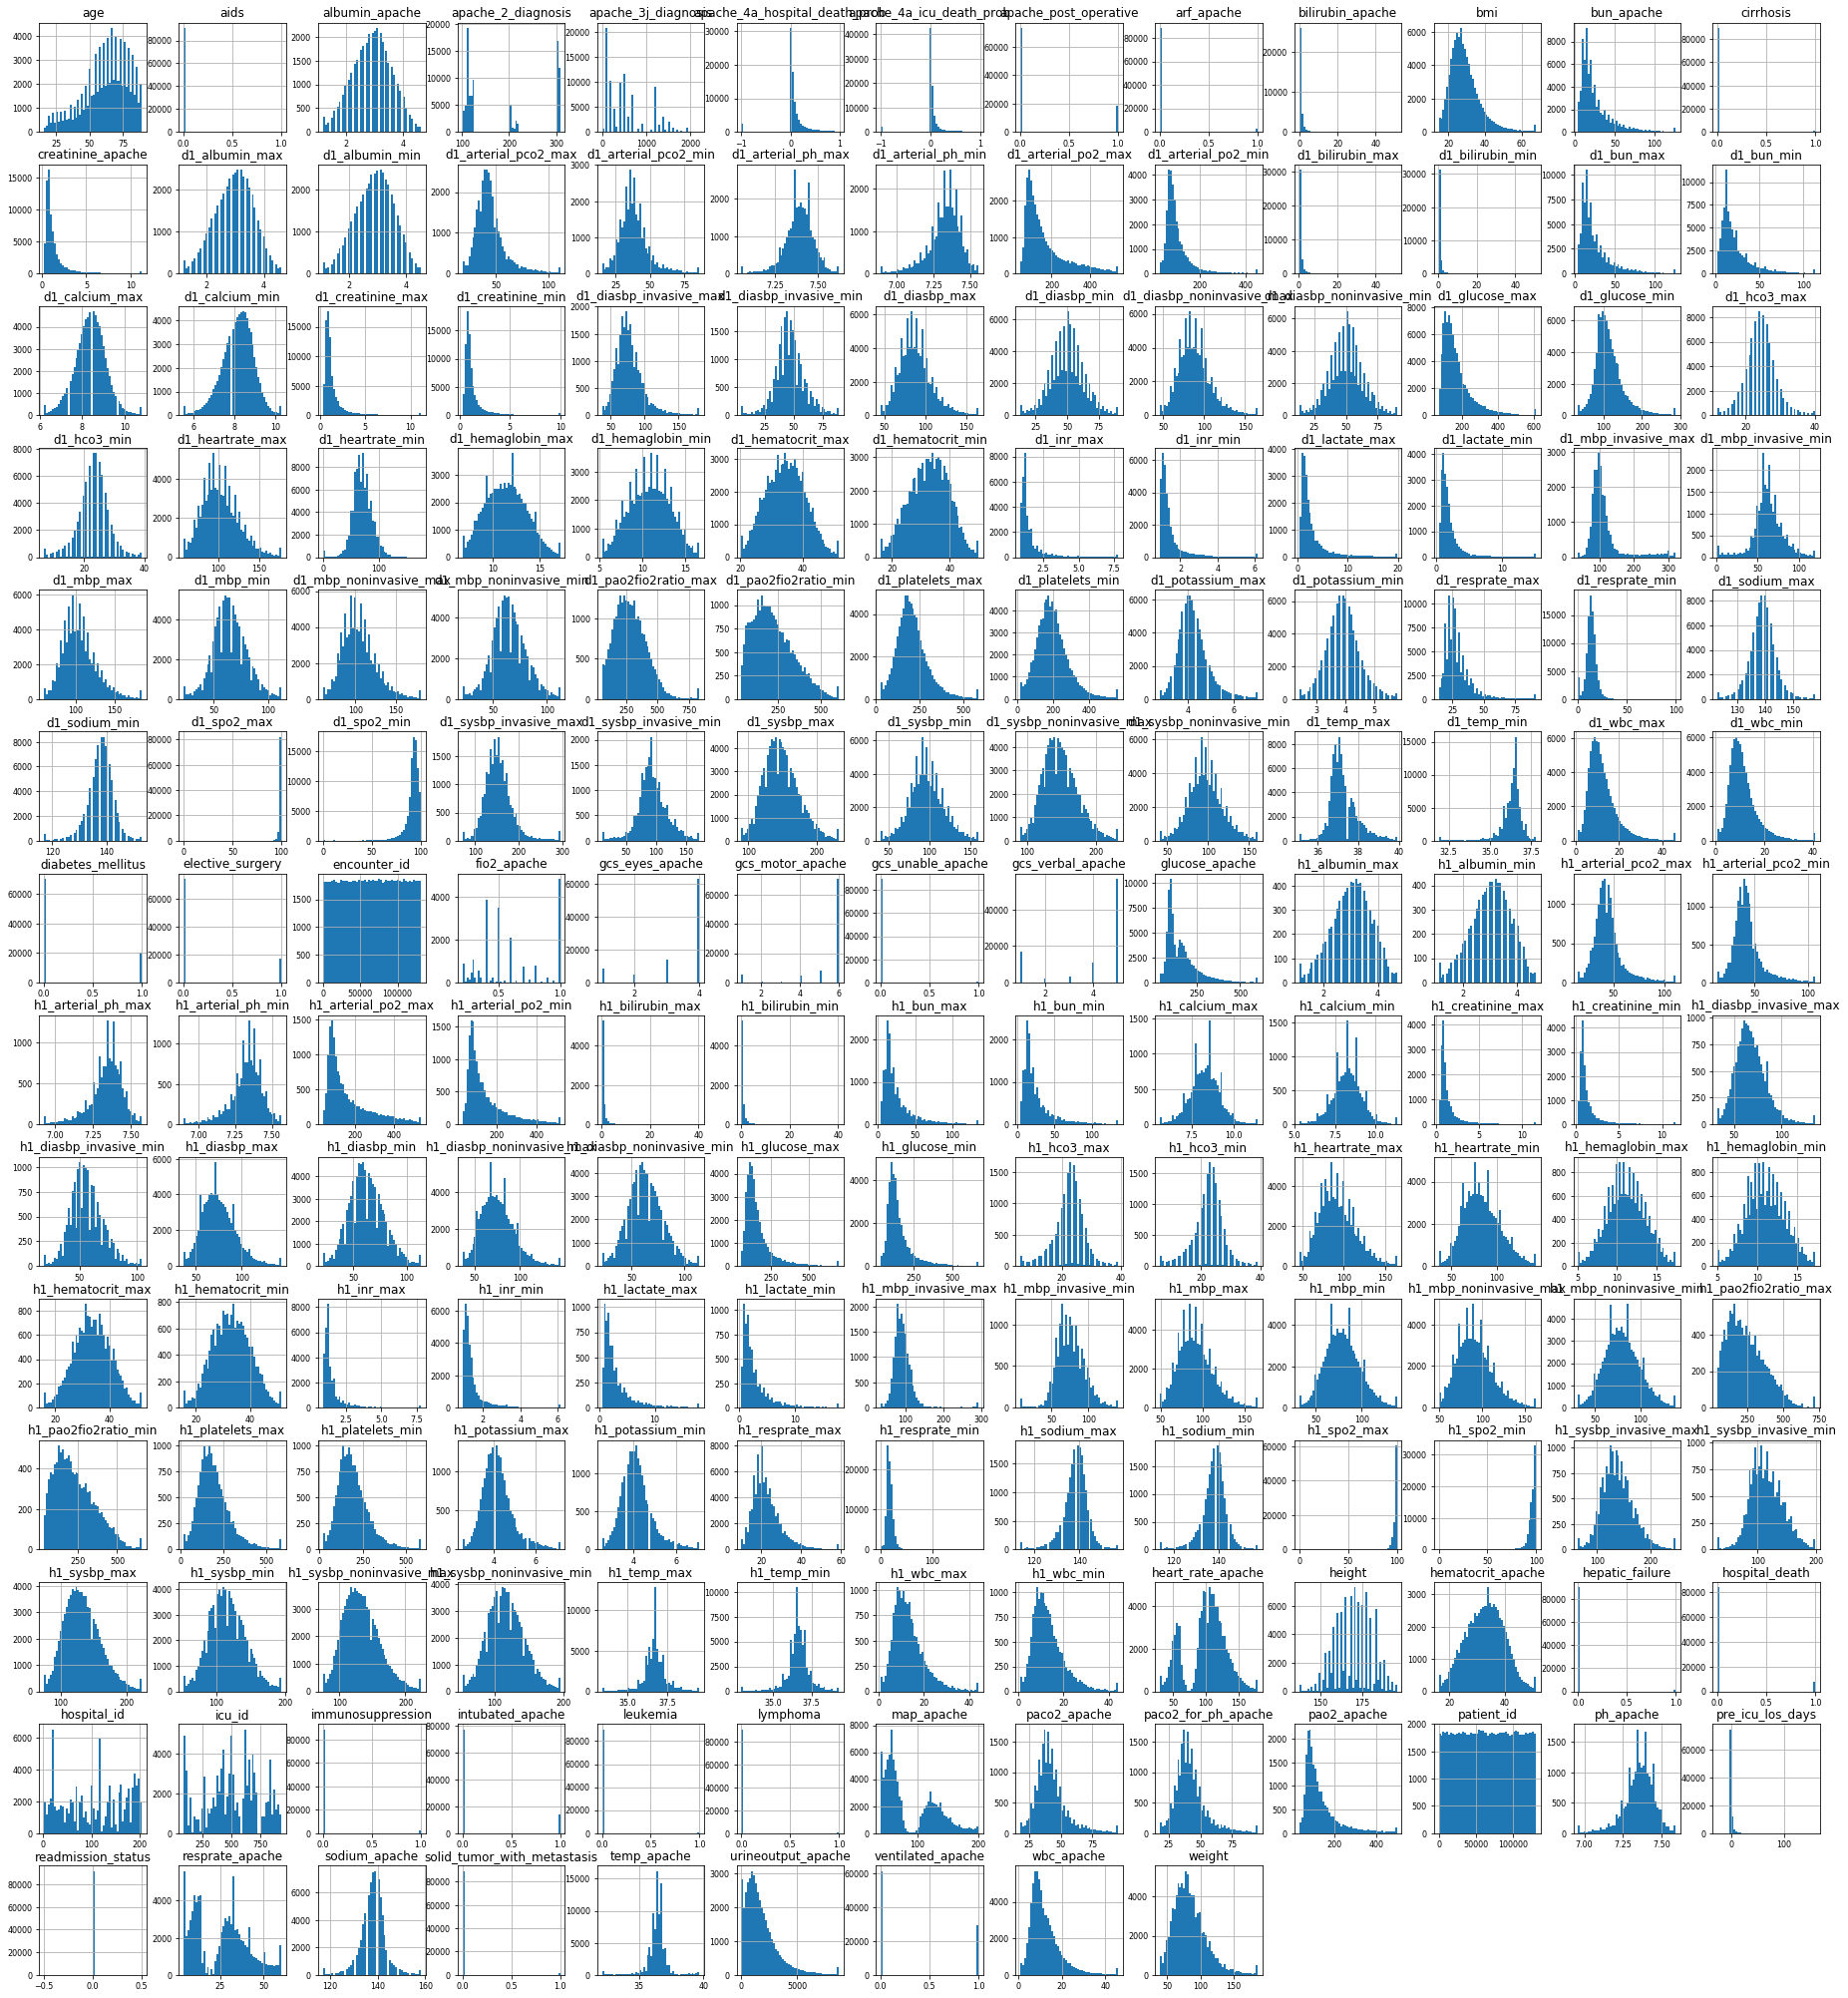

In [7]:
df_num.hist(figsize=(32, 36), bins=50, xlabelsize=8, ylabelsize=8)
plt.show()

In [64]:
# Check if the data is balanced or unbalanced
df['hospital_death'].value_counts(normalize=True)

0    0.913698
1    0.086302
Name: hospital_death, dtype: float64

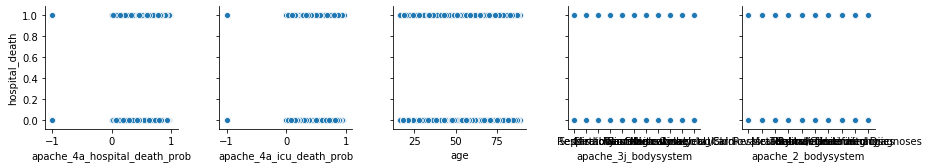

In [7]:
sns.pairplot(data=df,
             y_vars=['hospital_death'],
             x_vars=['apache_4a_hospital_death_prob', 'apache_4a_icu_death_prob', 'age', 'apache_3j_bodysystem', 'apache_2_bodysystem'])

In [25]:
corr_matrix = df.corr()['hospital_death'].abs()
corr_matrix

encounter_id                     0.005243
patient_id                       0.004877
hospital_id                      0.001255
hospital_death                   1.000000
age                              0.111017
bmi                              0.031247
elective_surgery                 0.093574
height                           0.019526
icu_id                           0.000994
pre_icu_los_days                 0.063316
readmission_status                    NaN
weight                           0.038362
albumin_apache                   0.193809
apache_2_diagnosis               0.089862
apache_3j_diagnosis              0.090715
apache_post_operative            0.083674
arf_apache                       0.027309
bilirubin_apache                 0.137464
bun_apache                       0.181435
creatinine_apache                0.114699
fio2_apache                      0.212249
gcs_eyes_apache                  0.260373
gcs_motor_apache                 0.282449
gcs_unable_apache                0

In [5]:
subset = df[ ['patient_id', "encounter_id", 'icu_id', 'apache_2_diagnosis', 'apache_3j_diagnosis', 
              'apache_4a_icu_death_prob', 'apache_4a_hospital_death_prob']]
corr_matrix = subset.corr().abs()
corr_matrix

,patient_id,encounter_id,icu_id,apache_2_diagnosis,apache_3j_diagnosis,apache_4a_icu_death_prob,apache_4a_hospital_death_prob
patient_id,1.000000,0.009575,0.001770,0.001539,0.004215,0.001625,0.003735
encounter_id,0.009575,1.000000,0.000992,0.000113,0.000651,0.000344,0.000513
icu_id,0.001770,0.000992,1.000000,0.029820,0.034326,0.002002,0.006706
apache_2_diagnosis,0.001539,0.000113,0.029820,1.000000,0.393110,0.098586,0.097887
apache_3j_diagnosis,0.004215,0.000651,0.034326,0.393110,1.000000,0.058175,0.095637
apache_4a_icu_death_prob,0.001625,0.000344,0.002002,0.098586,0.058175,1.000000,0.878988
apache_4a_hospital_death_prob,0.003735,0.000513,0.006706,0.097887,0.095637,0.878988,1.000000


In [13]:
## APACHE II SCORE
df['apache_2_bodysystem'].unique()

array(['Cardiovascular', 'Respiratory', 'Metabolic', 'Trauma',
       'Neurologic', 'Gastrointestinal', 'Renal/Genitourinary', nan,
       'Undefined diagnoses', 'Haematologic', 'Undefined Diagnoses'],
      dtype=object)

In [14]:
df['apache_3j_bodysystem'].unique()

array(['Sepsis', 'Respiratory', 'Metabolic', 'Cardiovascular', 'Trauma',
       'Neurological', 'Gastrointestinal', 'Genitourinary', nan,
       'Hematological', 'Musculoskeletal/Skin', 'Gynecological'],
      dtype=object)

## Exploration - Meghna's Vars

In [8]:
id_vars = ["encounter_id", "hospital_id", "patient_id", "hospital_death", "age", "bmi",
           "elective_surgery", "ethnicity", "gender", "height", "hospital_admit_source",
           "icu_admit_source", "icu_id", "icu_stay_type", "icu_type", 
           "pre_icu_los_days", "readmission_status", "weight"]

#h1_col = [col for col in list(df.columns) if col.startswith('h1_')]

var_list = ["apache_4a_hospital_death_prob", "apache_4a_icu_death_prob", "aids", "cirrhosis",
            "diabetes_mellitus", "hepatic_failure", "immunosuppression", "leukemia", "lymphoma",
            "solid_tumor_with_metastasis", "apache_3j_bodysystem", "apache_2_bodysystem", "h1_heartrate_max",
            "h1_heartrate_min", "h1_mbp_invasive_max", "h1_mbp_invasive_min", "h1_mbp_max", "h1_mbp_min", 
            "h1_mbp_noninvasive_max", "h1_mbp_noninvasive_min", "h1_resprate_max", "h1_resprate_min", 
            "h1_spo2_max", "h1_spo2_min", "h1_sysbp_invasive_max", "h1_sysbp_invasive_min", "h1_sysbp_max", 
            "h1_sysbp_min", "h1_sysbp_noninvasive_max", "h1_sysbp_noninvasive_min", "h1_temp_max", "h1_temp_min"]

In [9]:
subset = df[id_vars + var_list]
#subset = df[id_vars] + df.loc[:, df.columns.str.startswith('hl_')] + df[var_list]

In [10]:
null_values(subset)

Dataframe has 50 columns.
There are 40 columns that have missing values.


,Missing Values,% of Total Values
h1_sysbp_invasive_min,74915,81.7
h1_sysbp_invasive_max,74915,81.7
h1_mbp_invasive_min,74844,81.6
h1_mbp_invasive_max,74844,81.6
h1_temp_min,21732,23.7
h1_temp_max,21732,23.7
hospital_admit_source,21409,23.3
h1_mbp_noninvasive_min,9084,9.9
h1_mbp_noninvasive_max,9084,9.9
apache_4a_icu_death_prob,7947,8.7


In [11]:
subset.describe()

,encounter_id,hospital_id,patient_id,hospital_death,age,bmi,elective_surgery,height,icu_id,pre_icu_los_days,readmission_status,weight,apache_4a_hospital_death_prob,apache_4a_icu_death_prob,aids,cirrhosis,diabetes_mellitus,hepatic_failure,immunosuppression,leukemia,lymphoma,solid_tumor_with_metastasis,h1_heartrate_max,h1_heartrate_min,h1_mbp_invasive_max,h1_mbp_invasive_min,h1_mbp_max,h1_mbp_min,h1_mbp_noninvasive_max,h1_mbp_noninvasive_min,h1_resprate_max,h1_resprate_min,h1_spo2_max,h1_spo2_min,h1_sysbp_invasive_max,h1_sysbp_invasive_min,h1_sysbp_max,h1_sysbp_min,h1_sysbp_noninvasive_max,h1_sysbp_noninvasive_min,h1_temp_max,h1_temp_min
count,91713.000000,91713.000000,91713.000000,91713.000000,87485.000000,88284.000000,91713.000000,90379.000000,91713.000000,91713.000000,91713.0,88993.000000,83766.000000,83766.000000,90998.000000,90998.000000,90998.000000,90998.000000,90998.000000,90998.000000,90998.000000,90998.000000,88923.000000,88923.000000,16869.000000,16869.000000,87074.000000,87074.000000,82629.000000,82629.000000,87356.000000,87356.000000,87528.000000,87528.000000,16798.000000,16798.000000,88102.000000,88102.000000,84372.000000,84372.000000,69981.000000,69981.000000
mean,65606.079280,105.669262,65537.131464,0.086302,62.309516,29.185818,0.183736,169.641588,508.357692,0.835766,0.0,84.028340,0.086787,0.043955,0.000857,0.015693,0.225192,0.012989,0.026165,0.007066,0.004132,0.020638,92.229198,83.663720,94.883633,75.971130,91.612950,79.400028,91.594126,79.709315,22.633614,17.211525,98.044637,95.174310,138.702822,114.834099,133.247395,116.362296,133.054686,116.549625,36.710858,36.607651
std,37795.088538,62.854406,37811.252183,0.280811,16.775119,8.275142,0.387271,10.795378,228.989661,2.487756,0.0,25.011497,0.247569,0.217341,0.029265,0.124284,0.417711,0.113229,0.159628,0.083763,0.064148,0.142169,21.823704,20.279869,30.814198,19.225052,20.533174,19.130590,20.552018,19.236507,7.515043,6.072588,3.212934,6.625227,29.209769,27.972481,27.556986,26.510637,27.679751,26.623528,0.753090,0.776706
min,1.000000,2.000000,1.000000,0.000000,16.000000,14.844926,0.000000,137.200000,82.000000,-24.947222,0.0,38.600000,-1.000000,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,46.000000,36.000000,35.625000,8.000000,49.000000,32.000000,49.000000,32.000000,10.000000,0.000000,0.000000,0.000000,65.000000,31.440000,75.000000,53.000000,75.000000,53.000000,33.400000,32.900000
25%,32852.000000,47.000000,32830.000000,0.000000,52.000000,23.641975,0.000000,162.500000,369.000000,0.035417,0.0,66.800000,0.020000,0.010000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,77.000000,69.000000,78.000000,63.000000,77.000000,66.000000,77.000000,66.000000,18.000000,14.000000,97.000000,94.000000,119.000000,95.000000,113.000000,98.000000,113.000000,98.000000,36.400000,36.300000
50%,65665.000000,109.000000,65413.000000,0.000000,65.000000,27.654655,0.000000,170.100000,504.000000,0.138889,0.0,80.300000,0.050000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,90.000000,82.000000,90.000000,74.000000,90.000000,78.000000,90.000000,79.000000,21.000000,16.000000,99.000000,96.000000,136.000000,112.000000,131.000000,115.000000,130.000000,115.000000,36.700000,36.600000
75%,98342.000000,161.000000,98298.000000,0.000000,75.000000,32.930206,0.000000,177.800000,679.000000,0.409028,0.0,97.100000,0.130000,0.060000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,106.000000,97.000000,104.000000,88.000000,104.000000,92.000000,104.000000,92.000000,26.000000,20.000000,100.000000,99.000000,156.000000,133.000000,150.000000,134.000000,150.000000,134.000000,37.000000,36.940000
max,131051.000000,204.000000,131051.000000,1.000000,89.000000,67.814990,1.000000,195.590000,927.000000,159.090972,0.0,186.000000,0.990000,0.970000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,164.000000,144.000000,293.375000,140.000000,165.000000,138.000000,163.000000,138.000000,59.000000,18

In [12]:
corr_matrix = subset.corr()['hospital_death'].abs()
corr_matrix.sort_values(ascending=False)

hospital_death                   1.000000
apache_4a_hospital_death_prob    0.311043
apache_4a_icu_death_prob         0.283913
h1_sysbp_noninvasive_min         0.149159
h1_mbp_noninvasive_min           0.148223
h1_sysbp_min                     0.146440
h1_mbp_min                       0.141619
h1_resprate_max                  0.121933
h1_temp_min                      0.121910
h1_heartrate_max                 0.113603
h1_sysbp_invasive_min            0.113519
age                              0.111017
h1_resprate_min                  0.110725
h1_spo2_min                      0.108551
h1_temp_max                      0.103511
h1_mbp_invasive_min              0.094607
elective_surgery                 0.093574
h1_heartrate_min                 0.087138
h1_sysbp_invasive_max            0.082213
h1_sysbp_max                     0.068797
h1_sysbp_noninvasive_max         0.068093
h1_mbp_noninvasive_max           0.063793
pre_icu_los_days                 0.063316
h1_mbp_max                       0

In [13]:
subset['icu_stay_type'].unique()

array(['admit', 'readmit', 'transfer'], dtype=object)

In [14]:
pd.crosstab(subset['icu_stay_type'], subset['hospital_death']) / len(subset)

hospital_death,0,1
icu_stay_type,,
admit,0.859671,0.080032
readmit,0.005561,0.000545
transfer,0.048466,0.005724


In [15]:
subset['hospital_admit_source'].unique()

array(['Floor', 'Emergency Department', 'Operating Room', nan,
       'Direct Admit', 'Other Hospital', 'Other ICU', 'ICU to SDU',
       'Recovery Room', 'Chest Pain Center', 'Step-Down Unit (SDU)',
       'Acute Care/Floor', 'PACU', 'Observation', 'ICU', 'Other'],
      dtype=object)

In [16]:
pd.crosstab(subset['hospital_admit_source'], subset['hospital_death']) 

hospital_death,0,1
hospital_admit_source,,
Acute Care/Floor,1709,201
Chest Pain Center,126,8
Direct Admit,5780,661
Emergency Department,33735,3227
Floor,6937,1118
ICU,32,3
ICU to SDU,42,3
Observation,10,0
Operating Room,9442,345


In [17]:
subset[['elective_surgery']].groupby('elective_surgery').size() / len(subset)

elective_surgery
0    0.816264
1    0.183736
dtype: float64

In [18]:
subset["readmission_status"].unique()

array([0])

## h1_heartrate_max, h1_heartrate_min 
## The patient's highest/lowest heart rate during the first hour of their unit stay 

In [232]:
# Only 3% of the data is missing both variables. 
subset[["h1_heartrate_max", "h1_heartrate_min"]].isnull(). \
groupby(["h1_heartrate_max", "h1_heartrate_min"]).sum()
# When one is missing, the other is too

,
h1_heartrate_max,h1_heartrate_min
False,False
True,True


array([<matplotlib.axes._subplots.AxesSubplot object at 0x1a266accc0>,
      dtype=object)

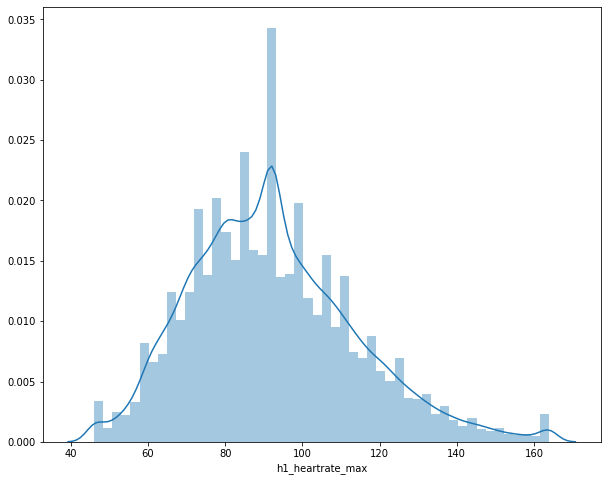

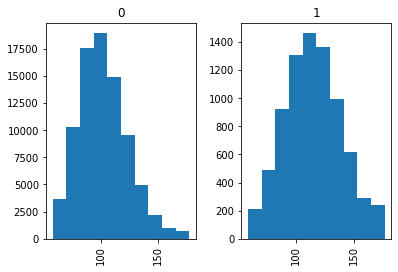

In [63]:
fig, ax = plt.subplots(figsize=(10,8))
#sns.boxplot(x="h1_heartrate_max", y="hospital_death", orient = "h", data=subset)
sns.distplot(df['h1_heartrate_max'])

df['d1_heartrate_max'].hist(bins = 10, by=df['hospital_death'])

array([<matplotlib.axes._subplots.AxesSubplot object at 0x1a268c61d0>,
      dtype=object)

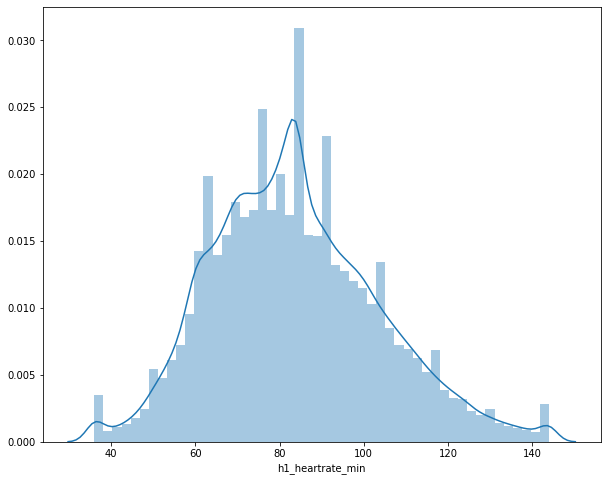

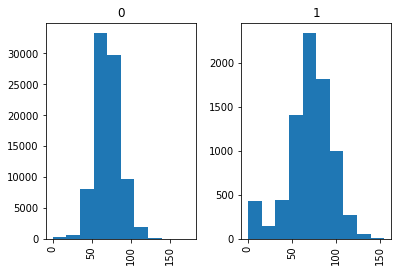

In [64]:
fig, ax = plt.subplots(figsize=(10,8))
#sns.boxplot(x="h1_heartrate_min", y="hospital_death", orient = "h", data=subset)
sns.distplot(df['h1_heartrate_min'])

df['d1_heartrate_min'].hist(bins = 10, by=df['hospital_death'])

In [140]:
subset[subset.h1_heartrate_max.isnull()][["hospital_death", "hospital_admit_source", "readmission_status"]].\
groupby(["hospital_death", "hospital_admit_source", "readmission_status"]).size()\
/ len(subset[subset.h1_heartrate_max.isnull()])

hospital_death  hospital_admit_source  readmission_status
0               Acute Care/Floor       0                     0.039785
                Chest Pain Center      0                     0.000358
                Direct Admit           0                     0.067742
                Emergency Department   0                     0.457348
                Floor                  0                     0.091756
                ICU                    0                     0.000717
                Operating Room         0                     0.096057
                Other Hospital         0                     0.010753
                Other ICU              0                     0.002867
                PACU                   0                     0.003226
                Recovery Room          0                     0.022581
                Step-Down Unit (SDU)   0                     0.005018
1               Acute Care/Floor       0                     0.002867
                Direct Admit    

### 3% missing

In [104]:
#fig, ax = plt.subplots(figsize=(10,8))
#sns.scatterplot(x="age", y="h1_heartrate_min", data=subset)
#sns.boxplot(x="h1_heartrate_min", y="gender", orient = "h", data=subset)
# chronic conditions??

# Age and Gender do not contribute to heartrate

df['h1_heartrate_max'] = df['h1_heartrate_max'].fillna(df['h1_heartrate_max'].mean())
df['h1_heartrate_min'] = df['h1_heartrate_min'].fillna(df['h1_heartrate_min'].mean())

## h1_mbp_invasive_max, h1_mbp_invasive_min
## The patient's highest/lowest mean blood pressure during the first hour of their unit stay, invasively measured

In [105]:
subset[["h1_mbp_invasive_max", "h1_mbp_invasive_min"]].isnull(). \
groupby(["h1_mbp_invasive_max", "h1_mbp_invasive_min"]).sum()

,
h1_mbp_invasive_max,h1_mbp_invasive_min
False,False
True,True


array([<matplotlib.axes._subplots.AxesSubplot object at 0x1a25812f98>,
      dtype=object)

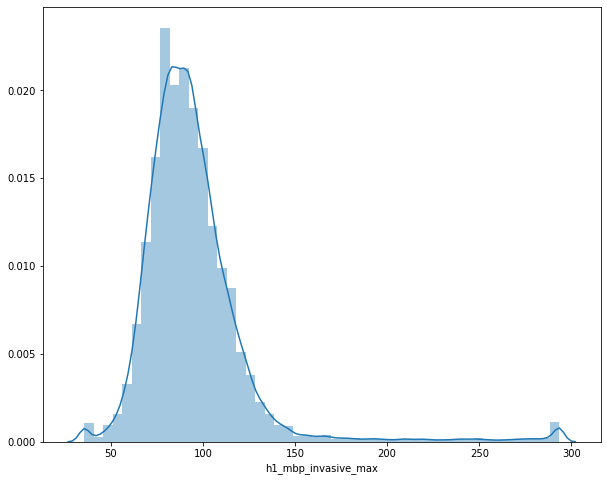

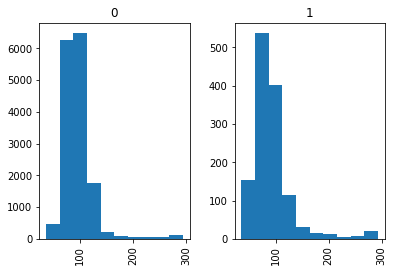

In [106]:
fig, ax = plt.subplots(figsize=(10,8))
#sns.boxplot(x="h1_mbp_invasive_max", y="hospital_death", orient = "h", data=subset)
sns.distplot(df['h1_mbp_invasive_max'].dropna())

df['h1_mbp_invasive_max'].hist(bins = 10, by=df['hospital_death'])

array([<matplotlib.axes._subplots.AxesSubplot object at 0x1a208d2ef0>,
      dtype=object)

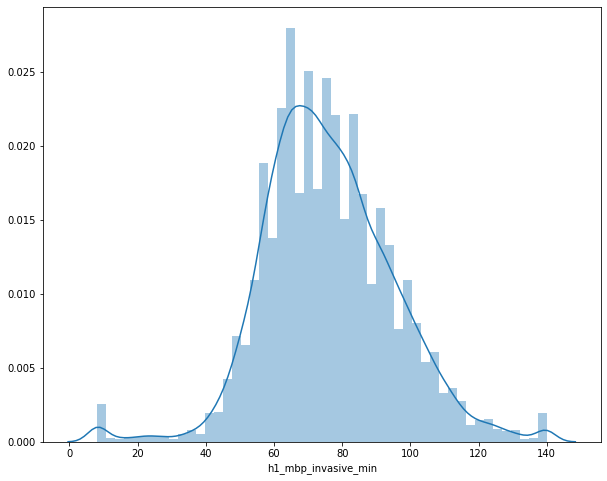

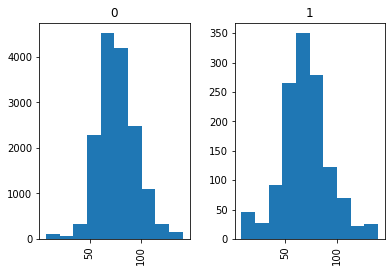

In [107]:
fig, ax = plt.subplots(figsize=(10,8))
#sns.boxplot(x="h1_mbp_invasive_min", y="hospital_death", orient = "h", data=subset)
sns.distplot(df['h1_mbp_invasive_min'].dropna())

df['h1_mbp_invasive_min'].hist(bins = 10, by=df['hospital_death'])

In [108]:
subset[subset.h1_mbp_invasive_max.isnull()][["hospital_death"]].groupby(["hospital_death"]).size()\
/ len(subset[subset.h1_mbp_invasive_max.isnull()])

hospital_death
0    0.911603
1    0.088397
dtype: float64

### 1.6% Missing

In [109]:
df['h1_mbp_invasive_max'] = df['h1_mbp_invasive_max'].fillna(df['h1_mbp_invasive_max'].median())
df['h1_mbp_invasive_min'] = df['h1_mbp_invasive_min'].fillna(df['h1_mbp_invasive_min'].mean())

## h1_mbp_max, h1_mbp_min
## The patient's highest/lowest mean blood pressure during the first hour of their unit stay, either non-invasively or invasively measured

In [110]:
# 81.6% obs are missing these
subset[["h1_mbp_max", "h1_mbp_min"]].isnull(). \
groupby(["h1_mbp_max", "h1_mbp_min"]).sum()

,
h1_mbp_max,h1_mbp_min
False,False
True,True


array([<matplotlib.axes._subplots.AxesSubplot object at 0x1a208d8278>,
      dtype=object)

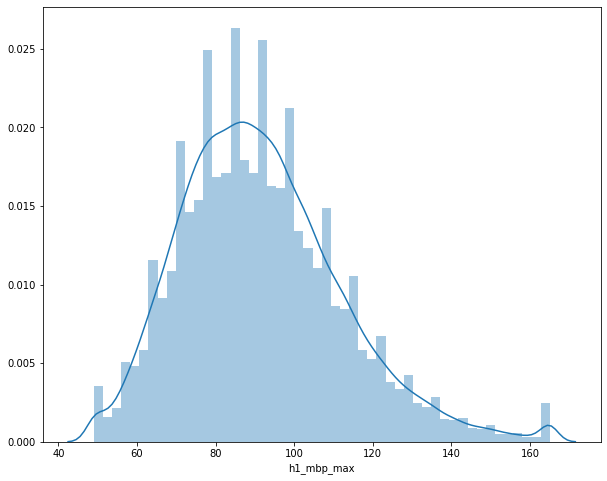

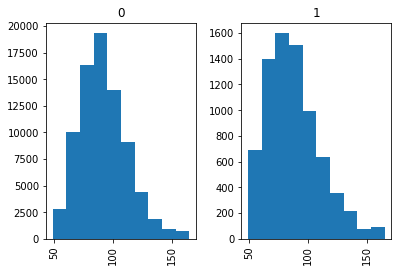

In [111]:
fig, ax = plt.subplots(figsize=(10,8))
#sns.boxplot(x="h1_mbp_max", y="hospital_death", orient = "h", data=subset)
sns.distplot(df['h1_mbp_max'].dropna())

df['h1_mbp_max'].hist(bins = 10, by=df['hospital_death'])

array([<matplotlib.axes._subplots.AxesSubplot object at 0x1a24d9ddd8>,
      dtype=object)

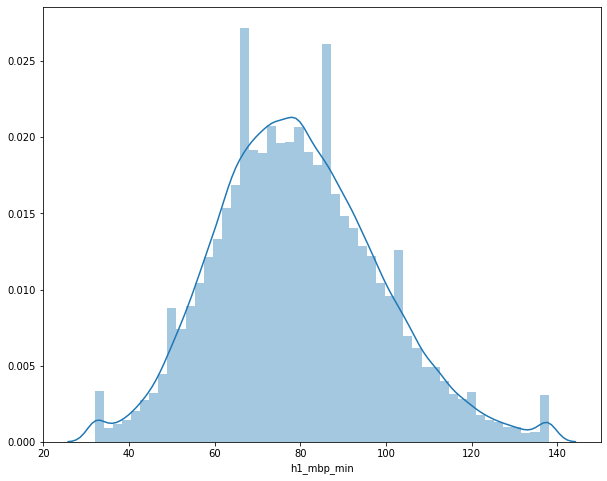

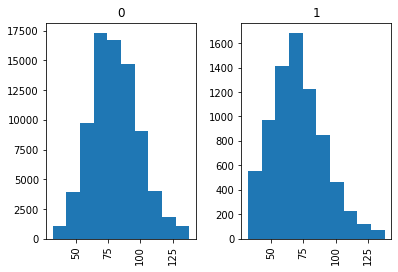

In [112]:
fig, ax = plt.subplots(figsize=(10,8))
#sns.boxplot(x="h1_mbp_min", y="hospital_death", orient = "h", data=subset)
sns.distplot(df['h1_mbp_min'].dropna())

df['h1_mbp_min'].hist(bins = 10, by=df['hospital_death'])

In [113]:
subset[subset.h1_mbp_max.isnull()][["hospital_death", "hospital_admit_source", "readmission_status"]].\
groupby(["hospital_death", "hospital_admit_source", "readmission_status"]).size() \
/ len(subset[subset.h1_mbp_max.isnull()])

hospital_death  hospital_admit_source  readmission_status
0               Acute Care/Floor       0                     0.027592
                Chest Pain Center      0                     0.000216
                Direct Admit           0                     0.070920
                Emergency Department   0                     0.446864
                Floor                  0                     0.105626
                ICU                    0                     0.000862
                ICU to SDU             0                     0.000216
                Operating Room         0                     0.081914
                Other                  0                     0.000216
                Other Hospital         0                     0.012287
                Other ICU              0                     0.004096
                PACU                   0                     0.003018
                Recovery Room          0                     0.025437
                Step-Down Unit (

### 5% missing

In [114]:
df['h1_mbp_max'] = df['h1_mbp_max'].fillna(df['h1_mbp_max'].mean())
df['h1_mbp_min'] = df['h1_mbp_min'].fillna(df['h1_mbp_min'].mean())

## h1_mbp_noninvasive_max, h1_mbp_noninvasive_min
## The patient's highest/lowest mean blood pressure during the first hour of their unit stay, non-invasively measured

In [115]:
subset[["h1_mbp_noninvasive_max", "h1_mbp_noninvasive_min"]].isnull(). \
groupby(["h1_mbp_noninvasive_max", "h1_mbp_noninvasive_min"]).sum()

,
h1_mbp_noninvasive_max,h1_mbp_noninvasive_min
False,False
True,True


array([<matplotlib.axes._subplots.AxesSubplot object at 0x1a24cf94e0>,
      dtype=object)

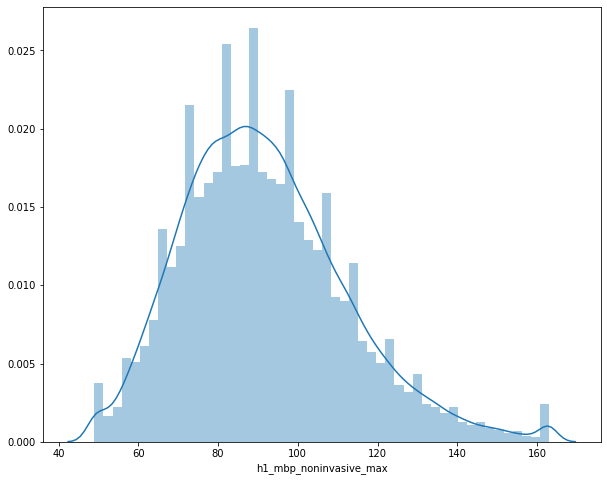

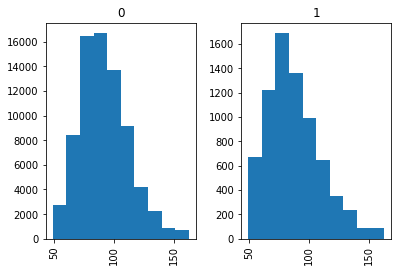

In [116]:
fig, ax = plt.subplots(figsize=(10,8))
#sns.boxplot(x="h1_mbp_noninvasive_max", y="hospital_death", orient = "h", data=subset)
sns.distplot(df['h1_mbp_noninvasive_max'].dropna())

df['h1_mbp_noninvasive_max'].hist(bins = 10, by=df['hospital_death'])

array([<matplotlib.axes._subplots.AxesSubplot object at 0x1a20b779e8>,
      dtype=object)

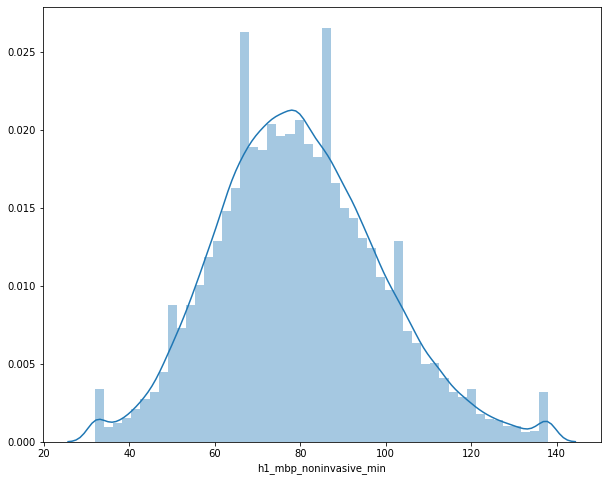

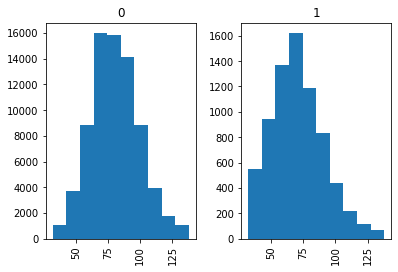

In [117]:
fig, ax = plt.subplots(figsize=(10,8))
#sns.boxplot(x="h1_mbp_noninvasive_min", y="hospital_death", orient = "h", data=subset)
sns.distplot(df['h1_mbp_noninvasive_min'].dropna())

df['h1_mbp_noninvasive_min'].hist(bins = 10, by=df['hospital_death'])

In [118]:
subset[subset.h1_mbp_noninvasive_max.isnull()][["hospital_death", "hospital_admit_source", "readmission_status"]].\
groupby(["hospital_death", "hospital_admit_source", "readmission_status"]).size() \
/ len(subset[subset.h1_mbp_noninvasive_max.isnull()])

hospital_death  hospital_admit_source  readmission_status
0               Acute Care/Floor       0                     0.016513
                Chest Pain Center      0                     0.000330
                Direct Admit           0                     0.052400
                Emergency Department   0                     0.258036
                Floor                  0                     0.066491
                ICU                    0                     0.000661
                ICU to SDU             0                     0.001101
                Operating Room         0                     0.334654
                Other                  0                     0.000110
                Other Hospital         0                     0.011118
                Other ICU              0                     0.003523
                PACU                   0                     0.007596
                Recovery Room          0                     0.043593
                Step-Down Unit (

### 10% missing

In [119]:
df['h1_mbp_noninvasive_max'] = df['h1_mbp_noninvasive_max'].fillna(df['h1_mbp_noninvasive_max'].mean())
df['h1_mbp_noninvasive_min'] = df['h1_mbp_noninvasive_min'].fillna(df['h1_mbp_noninvasive_min'].mean())

## h1_resprate_max, h1_resprate_min
## The patient's highest/lowest respiratory rate during the first hour of their unit stay

In [120]:
subset[["h1_resprate_max", "h1_resprate_min"]].isnull(). \
groupby(["h1_resprate_max", "h1_resprate_min"]).sum()

,
h1_resprate_max,h1_resprate_min
False,False
True,True


array([<matplotlib.axes._subplots.AxesSubplot object at 0x1a217922e8>,
      dtype=object)

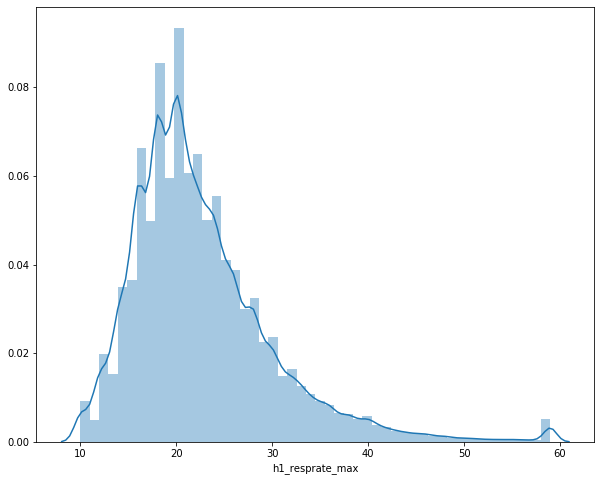

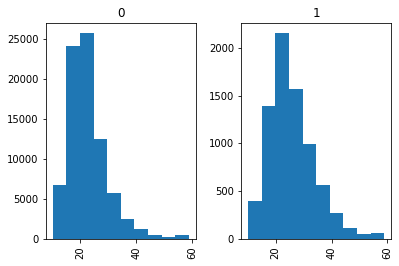

In [121]:
fig, ax = plt.subplots(figsize=(10,8))
#sns.boxplot(x="h1_resprate_max", y="hospital_death", orient = "h", data=subset)
sns.distplot(df['h1_resprate_max'].dropna())

df['h1_resprate_max'].hist(bins = 10, by=df['hospital_death'])

array([<matplotlib.axes._subplots.AxesSubplot object at 0x1a2660b128>,
      dtype=object)

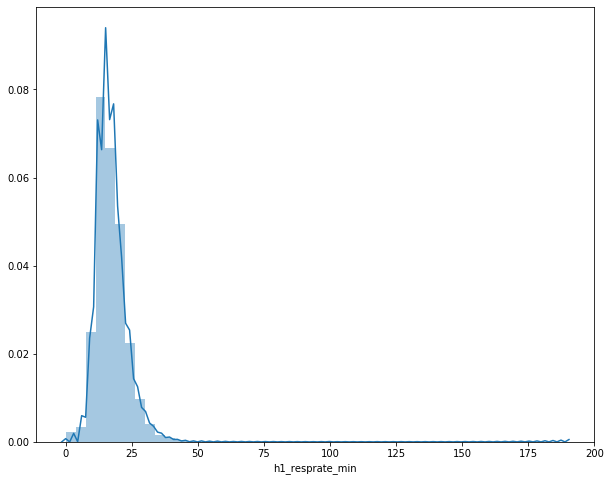

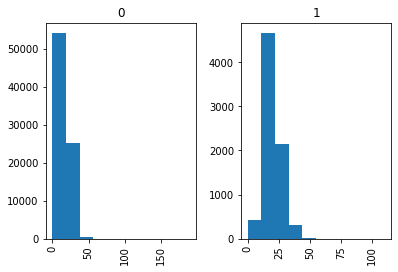

In [122]:
fig, ax = plt.subplots(figsize=(10,8))
#sns.boxplot(x="h1_resprate_min", y="hospital_death", orient = "h", data=subset)
sns.distplot(df['h1_resprate_min'].dropna())

df['h1_resprate_min'].hist(bins = 10, by=df['hospital_death'])

In [123]:
subset[subset.h1_resprate_max.isnull()][["hospital_death"]].groupby(["hospital_death"]).size() \
/ len(subset[subset.h1_resprate_max.isnull()])

hospital_death
0    0.922194
1    0.077806
dtype: float64

### 5% missing

In [124]:
df['h1_resprate_max'] = df['h1_resprate_max'].fillna(df['h1_resprate_max'].median())
df['h1_resprate_min'] = df['h1_resprate_min'].fillna(df['h1_resprate_min'].median())

## h1_spo2_max, h1_spo2_min
## The patient's highest/lowest peripheral oxygen saturation during the first hour of their unit stay

In [125]:
subset[["h1_spo2_max", "h1_spo2_min"]].isnull(). \
groupby(["h1_spo2_max", "h1_spo2_min"]).sum()

,
h1_spo2_max,h1_spo2_min
False,False
True,True


array([<matplotlib.axes._subplots.AxesSubplot object at 0x1a25682358>,
      dtype=object)

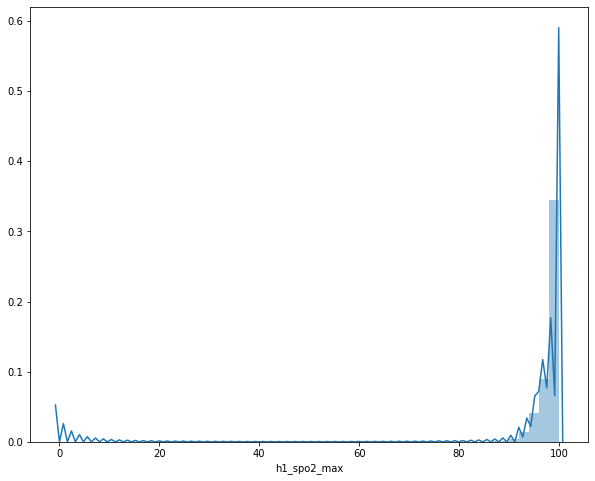

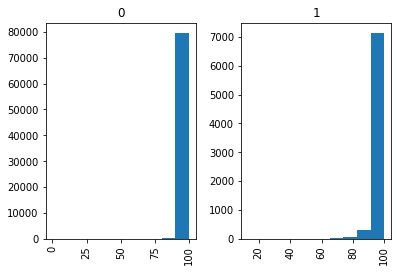

In [126]:
fig, ax = plt.subplots(figsize=(10,8))
#sns.boxplot(x="h1_spo2_max", y="hospital_death", orient = "h", data=subset)
sns.distplot(df['h1_spo2_max'].dropna())

df['h1_spo2_max'].hist(bins = 10, by=df['hospital_death'])

array([<matplotlib.axes._subplots.AxesSubplot object at 0x1a25697208>,
      dtype=object)

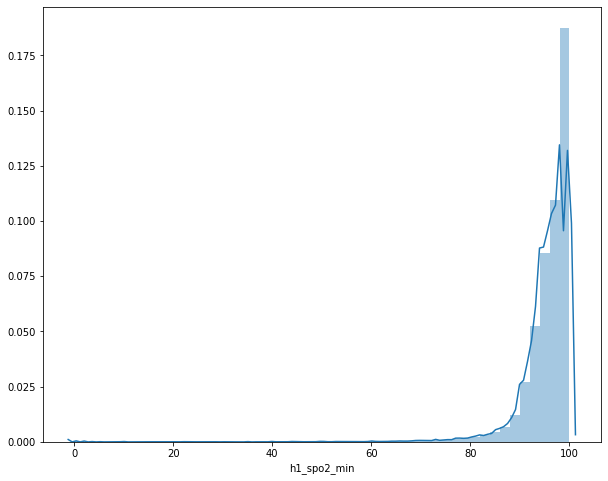

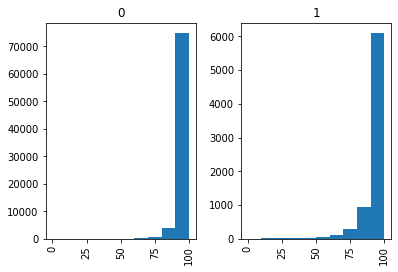

In [127]:
fig, ax = plt.subplots(figsize=(10,8))
#sns.boxplot(x="h1_spo2_min", y="hospital_death", orient = "h", data=subset)
sns.distplot(df['h1_spo2_min'].dropna())

df['h1_spo2_min'].hist(bins = 10, by=df['hospital_death'])

In [128]:
subset[subset.h1_spo2_max.isnull()][["hospital_death"]].groupby(["hospital_death"]).size() \
/ len(subset[subset.h1_spo2_max.isnull()])

hospital_death
0    0.910872
1    0.089128
dtype: float64

### 4.6% Missing

In [130]:
df['h1_spo2_max'] = df['h1_spo2_max'].fillna(df['h1_spo2_max'].median())
df['h1_spo2_min'] = df['h1_spo2_min'].fillna(df['h1_spo2_min'].median())

## h1_sysbp_invasive_max, h1_sysbp_invasive_min
## The patient's highest/lowest systolic blood pressure during the first hour of their unit stay, invasively measured

In [131]:
subset[["h1_sysbp_invasive_max", "h1_sysbp_invasive_min"]].isnull(). \
groupby(["h1_sysbp_invasive_max", "h1_sysbp_invasive_min"]).sum()

,
h1_sysbp_invasive_max,h1_sysbp_invasive_min
False,False
True,True


array([<matplotlib.axes._subplots.AxesSubplot object at 0x1a24b95a20>,
      dtype=object)

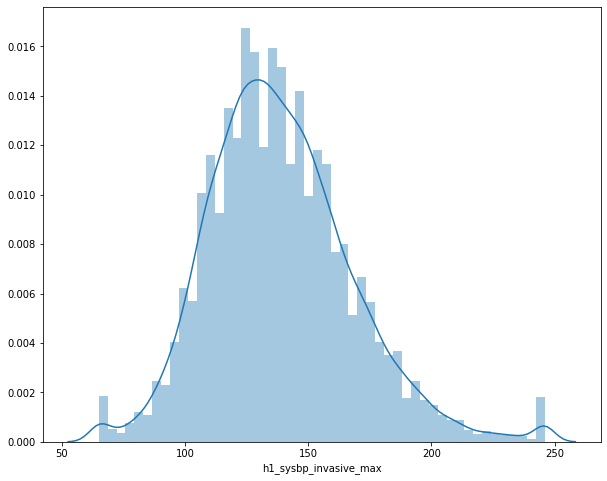

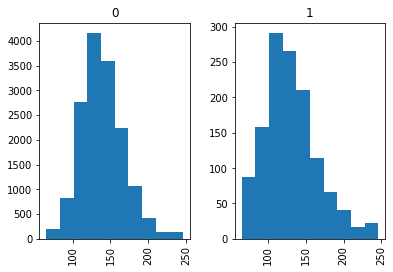

In [132]:
fig, ax = plt.subplots(figsize=(10,8))
#sns.boxplot(x="h1_sysbp_invasive_max", y="hospital_death", orient = "h", data=subset)
sns.distplot(df['h1_sysbp_invasive_max'].dropna())

df['h1_sysbp_invasive_max'].hist(bins = 10, by=df['hospital_death'])

array([<matplotlib.axes._subplots.AxesSubplot object at 0x1a25ec3400>,
      dtype=object)

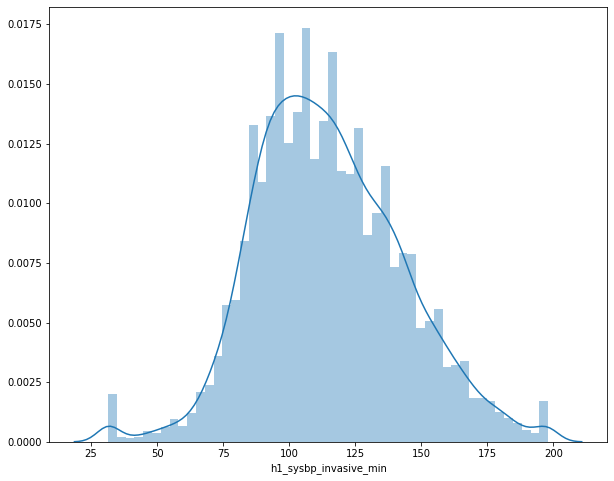

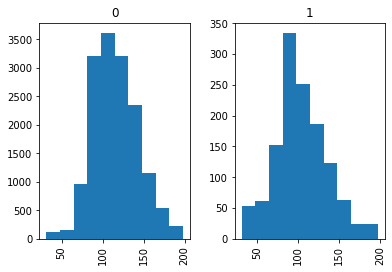

In [133]:
fig, ax = plt.subplots(figsize=(10,8))
#sns.boxplot(x="h1_sysbp_invasive_min", y="hospital_death", orient = "h", data=subset)
sns.distplot(df['h1_sysbp_invasive_min'].dropna())

df['h1_sysbp_invasive_min'].hist(bins = 10, by=df['hospital_death'])

In [134]:
subset[subset.h1_sysbp_invasive_max.isnull()][["hospital_death"]].groupby(["hospital_death"]).size() \
/ len(subset[subset.h1_sysbp_invasive_max.isnull()])

hospital_death
0    0.911366
1    0.088634
dtype: float64

### 81.7% Missing - drop variable

In [160]:
df['h1_sysbp_invasive_max'] = df['h1_sysbp_invasive_max'].fillna(-1)
df['h1_sysbp_invasive_min'] = df['h1_sysbp_invasive_min'].fillna(-1)

## h1_sysbp_max, h1_sysbp_min
## The patient's highest/lowest systolic blood pressure during the first hour of their unit stay, either non-invasively or invasively measured

In [135]:
subset[["h1_sysbp_max", "h1_sysbp_min"]].isnull(). \
groupby(["h1_sysbp_max", "h1_sysbp_min"]).sum()

,
h1_sysbp_max,h1_sysbp_min
False,False
True,True


array([<matplotlib.axes._subplots.AxesSubplot object at 0x1a2662cf60>,
      dtype=object)

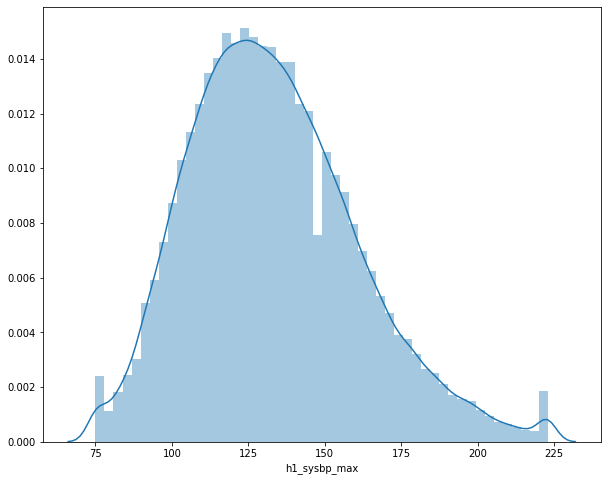

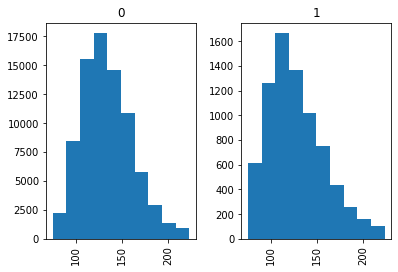

In [136]:
fig, ax = plt.subplots(figsize=(10,8))
#sns.boxplot(x="h1_sysbp_max", y="hospital_death", orient = "h", data=subset)
sns.distplot(df['h1_sysbp_max'].dropna())

df['h1_sysbp_max'].hist(bins = 10, by=df['hospital_death'])

array([<matplotlib.axes._subplots.AxesSubplot object at 0x1a270b3550>,
      dtype=object)

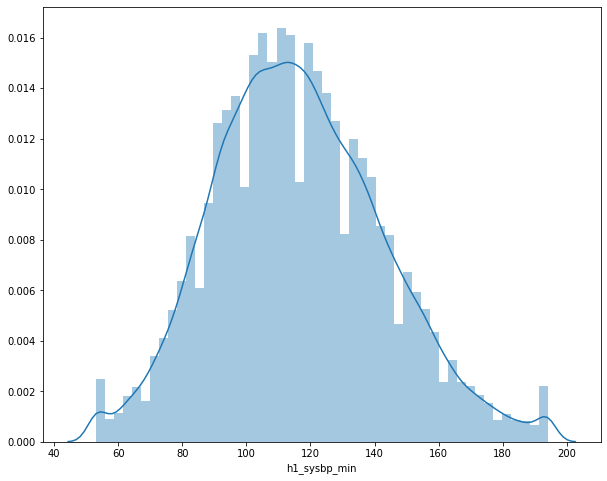

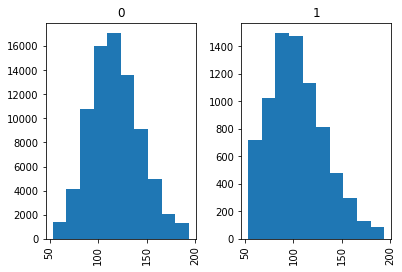

In [137]:
fig, ax = plt.subplots(figsize=(10,8))
#sns.boxplot(x="h1_sysbp_min", y="hospital_death", orient = "h", data=subset)
sns.distplot(df['h1_sysbp_min'].dropna())

df['h1_sysbp_min'].hist(bins = 10, by=df['hospital_death'])

In [138]:
subset[subset.h1_sysbp_max.isnull()][["hospital_death"]].groupby(["hospital_death"]).size() \
/ len(subset[subset.h1_sysbp_max.isnull()])

hospital_death
0    0.922182
1    0.077818
dtype: float64

### ~5% Missing

In [139]:
df['h1_sysbp_max'] = df['h1_sysbp_max'].fillna(df['h1_sysbp_max'].mean())
df['h1_sysbp_min'] = df['h1_sysbp_min'].fillna(df['h1_sysbp_min'].mean())

## h1_sysbp_noninvasive_max, h1_sysbp_noninvasive_min
## The patient's highest/lowest systolic blood pressure during the first hour of their unit stay, non-invasively measured

In [140]:
subset[["h1_sysbp_noninvasive_max", "h1_sysbp_noninvasive_min"]].isnull(). \
groupby(["h1_sysbp_noninvasive_max", "h1_sysbp_noninvasive_min"]).sum()

,
h1_sysbp_noninvasive_max,h1_sysbp_noninvasive_min
False,False
True,True


array([<matplotlib.axes._subplots.AxesSubplot object at 0x1a25726940>,
      dtype=object)

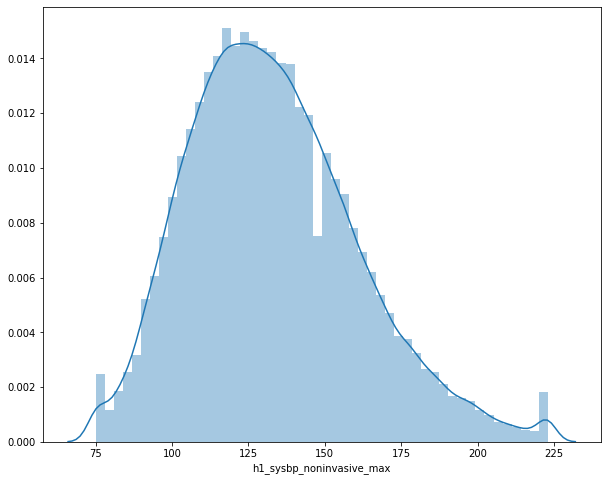

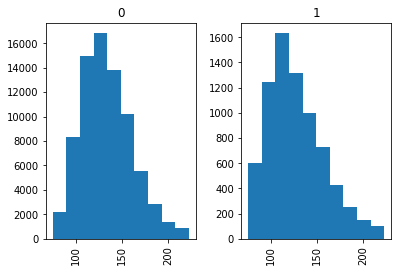

In [141]:
fig, ax = plt.subplots(figsize=(10,8))
#sns.boxplot(x="h1_sysbp_noninvasive_max", y="hospital_death", orient = "h", data=subset)
sns.distplot(df['h1_sysbp_noninvasive_max'].dropna())

df['h1_sysbp_noninvasive_max'].hist(bins = 10, by=df['hospital_death'])

array([<matplotlib.axes._subplots.AxesSubplot object at 0x1a24b2d588>,
      dtype=object)

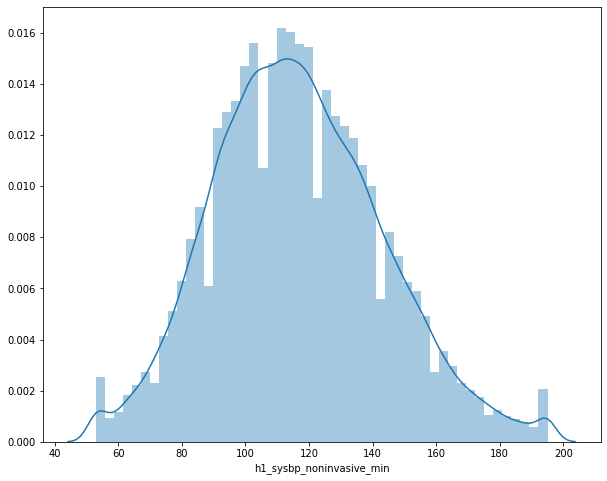

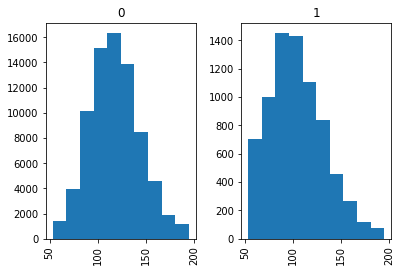

In [142]:
fig, ax = plt.subplots(figsize=(10,8))
#sns.boxplot(x="h1_sysbp_noninvasive_min", y="hospital_death", orient = "h", data=subset)
sns.distplot(df['h1_sysbp_noninvasive_min'].dropna())

df['h1_sysbp_noninvasive_min'].hist(bins = 10, by=df['hospital_death'])

In [143]:
subset[subset.h1_sysbp_noninvasive_max.isnull()][["hospital_death"]].groupby(["hospital_death"]).size() \
/ len(subset[subset.h1_sysbp_noninvasive_max.isnull()])

hospital_death
0    0.935976
1    0.064024
dtype: float64

### 8% missing

In [144]:
df['h1_sysbp_noninvasive_max'] = df['h1_sysbp_noninvasive_max'].fillna(df['h1_sysbp_noninvasive_max'].mean())
df['h1_sysbp_noninvasive_min'] = df['h1_sysbp_noninvasive_min'].fillna(df['h1_sysbp_noninvasive_min'].mean())

## h1_temp_max, h1_temp_min
## The patient's highest/lowest core temperature during the first hour of their unit stay, invasively measured

In [145]:
subset[["h1_temp_max", "h1_temp_min"]].isnull(). \
groupby(["h1_temp_max", "h1_temp_min"]).sum()

,
h1_temp_max,h1_temp_min
False,False
True,True


array([<matplotlib.axes._subplots.AxesSubplot object at 0x1a2566ea20>,
      dtype=object)

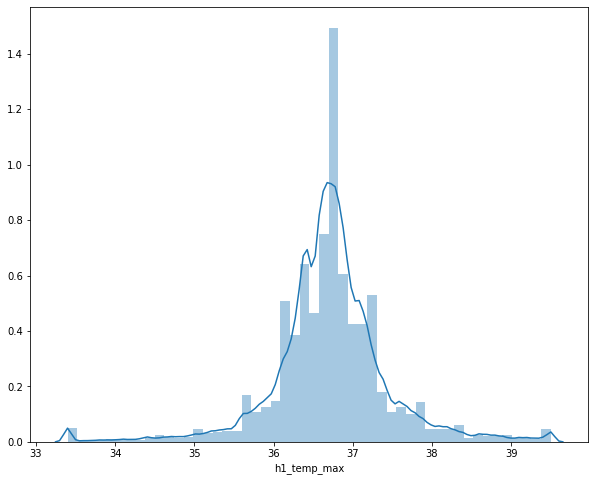

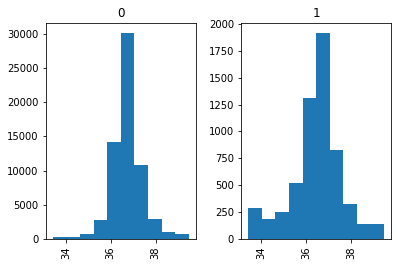

In [146]:
fig, ax = plt.subplots(figsize=(10,8))
#sns.boxplot(x="h1_temp_max", y="hospital_death", orient = "h", data=subset)
sns.distplot(df['h1_temp_max'].dropna())

df['h1_temp_max'].hist(bins = 10, by=df['hospital_death'])

array([<matplotlib.axes._subplots.AxesSubplot object at 0x1a25430b70>,
      dtype=object)

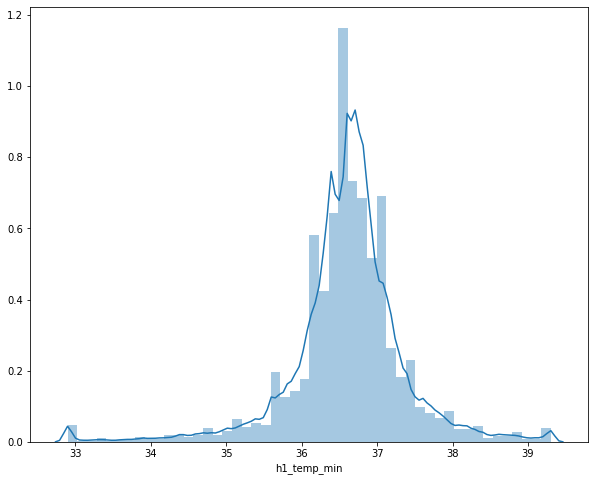

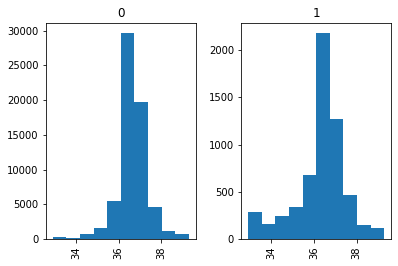

In [147]:
fig, ax = plt.subplots(figsize=(10,8))
#sns.boxplot(x="h1_temp_min", y="hospital_death", orient = "h", data=subset)
sns.distplot(df['h1_temp_min'].dropna())

df['h1_temp_min'].hist(bins = 10, by=df['hospital_death'])

In [148]:
subset[subset.h1_temp_max.isnull()][["hospital_death"]].groupby(["hospital_death"]).size() \
/ len(subset[subset.h1_temp_max.isnull()])

hospital_death
0    0.907234
1    0.092766
dtype: float64

### ~24% Missing

In [149]:
df['h1_temp_max'] = df['h1_temp_max'].fillna(df['h1_temp_max'].mode()[0])
df['h1_temp_min'] = df['h1_temp_min'].fillna(df['h1_temp_min'].mode()[0])

## h1_bilirubin_max, h1_bilirubin_min
## The highest/lowest bilirubin concentration of the patient in their serum or plasma during the first hour of their unit stay

In [244]:
subset[["h1_bilirubin_max", "h1_bilirubin_min"]].isnull(). \
groupby(["h1_bilirubin_max", "h1_bilirubin_min"]).sum()

,
h1_bilirubin_max,h1_bilirubin_min
False,False
True,True


array([<matplotlib.axes._subplots.AxesSubplot object at 0x1a21ec2e10>,
      dtype=object)

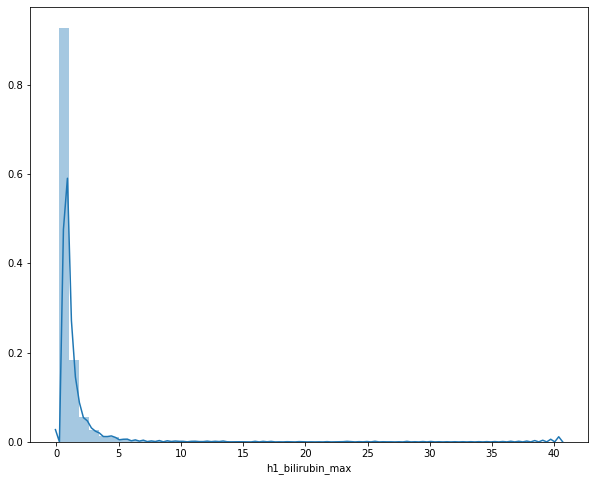

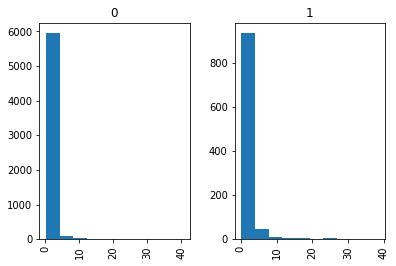

In [150]:
fig, ax = plt.subplots(figsize=(10,8))
#sns.boxplot(x="h1_bilirubin_max", y="hospital_death", orient = "h", data=subset)
sns.distplot(df['h1_bilirubin_max'].dropna())

df['h1_bilirubin_max'].hist(bins = 10, by=df['hospital_death'])

array([<matplotlib.axes._subplots.AxesSubplot object at 0x1a25070240>,
      dtype=object)

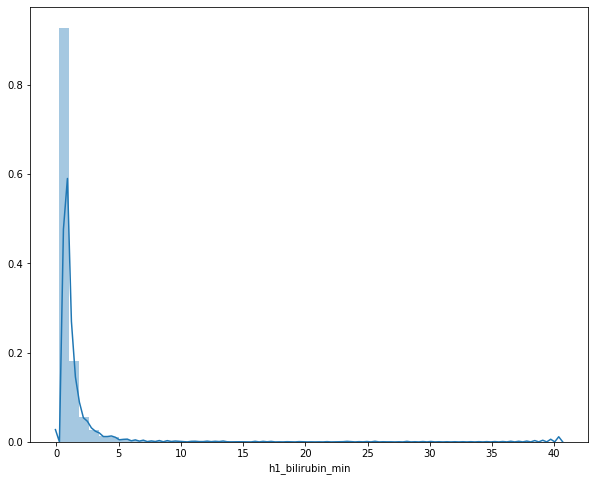

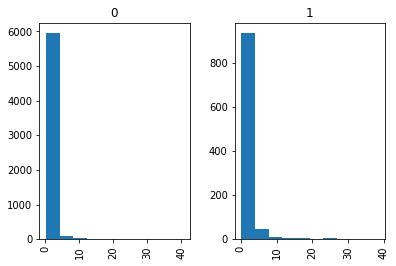

In [151]:
fig, ax = plt.subplots(figsize=(10,8))
#sns.boxplot(x="h1_bilirubin_min", y="hospital_death", orient = "h", data=subset)
sns.distplot(df['h1_bilirubin_min'].dropna())

df['h1_bilirubin_min'].hist(bins = 10, by=df['hospital_death'])

In [156]:
subset[subset.h1_bilirubin_max.isnull()][["hospital_death"]].groupby(["hospital_death"]).size() \
#/ len(subset[subset.h1_bilirubin_max.isnull()])

hospital_death
0    77719
1     6900
dtype: int64

### ~93% Missing

In [157]:
df['h1_bilirubin_max'] = df['h1_bilirubin_max'].fillna(-1)
df['h1_bilirubin_min'] = df['h1_bilirubin_min'].fillna(-1)

## apache_4a_hospital_death_prob
## The APACHE IVa probabilistic prediction of in-hospital mortality for the patient which utilizes the APACHE III score and other covariates, including diagnosis.

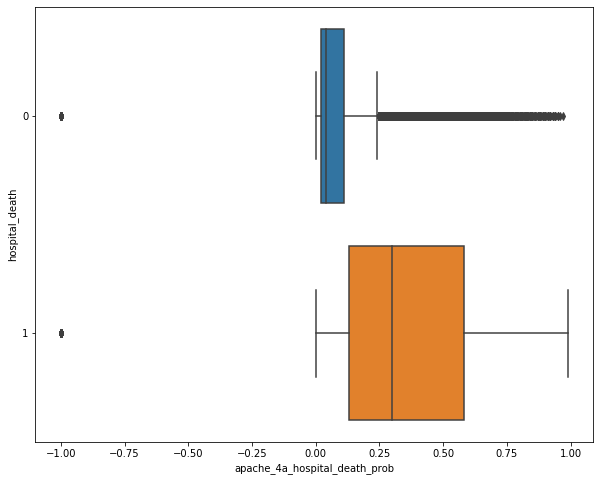

In [171]:
fig, ax = plt.subplots(figsize=(10,8))
sns.boxplot(x="apache_4a_hospital_death_prob", y="hospital_death", orient = "h", data=subset)

In [190]:
subset[["apache_4a_hospital_death_prob","hospital_death"]].\
groupby(["apache_4a_hospital_death_prob"], as_index = False).mean()

,apache_4a_hospital_death_prob,hospital_death
0,-1.00,0.094053
1,0.00,0.001608
2,0.01,0.003175
3,0.02,0.009228
4,0.03,0.016125
5,0.04,0.022181
6,0.05,0.035531
7,0.06,0.039231
8,0.07,0.046947
9,0.08,0.054898


## apache_4a_icu_death_prob
## The APACHE IVa probabilistic prediction of in ICU mortality for the patient which utilizes the APACHE III score and other covariates, including diagnosis

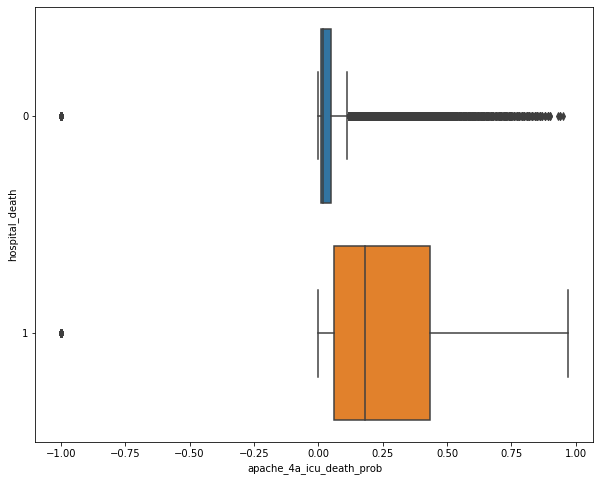

In [188]:
fig, ax = plt.subplots(figsize=(10,8))
sns.boxplot(x="apache_4a_icu_death_prob", y="hospital_death", orient = "h", data=subset)

In [209]:
subset[["apache_4a_icu_death_prob","hospital_death"]].\
groupby(["apache_4a_icu_death_prob"], as_index = False).mean()

,apache_4a_icu_death_prob,hospital_death
0,-1.00,0.091031
1,0.00,0.001960
2,0.01,0.011998
3,0.02,0.030427
4,0.03,0.040949
5,0.04,0.058406
6,0.05,0.073913
7,0.06,0.098260
8,0.07,0.092851
9,0.08,0.130114


In [219]:
subset[["apache_4a_icu_death_prob","icu_stay_type"]].groupby(["icu_stay_type"], as_index = False).median()

,icu_stay_type,apache_4a_icu_death_prob
0,admit,0.02
1,readmit,0.02
2,transfer,0.03


##  Whether patient was diagnosed or had a history of any of the following - 
## aids, cirrhosis, diabetes_mellitus, hepatic_failure, immunosuppression, leukemia, lymphoma or solid_tumor_with_metastasis

In [187]:
lst = ["aids","cirrhosis", "diabetes_mellitus", "hepatic_failure",
       "immunosuppression", "leukemia", "lymphoma", "solid_tumor_with_metastasis"]
    

for x in lst:
    print(pd.crosstab(subset[x], subset['hospital_death']), "\n")
    print(pd.crosstab(subset[x], subset['icu_stay_type']), "\n")

hospital_death      0     1
aids                       
0.0             83100  7820
1.0                68    10 

icu_stay_type  admit  readmit  transfer
aids                                   
0.0            85663      554      4703
1.0               75        2         1 

hospital_death      0     1
cirrhosis                  
0.0             81988  7582
1.0              1180   248 

icu_stay_type  admit  readmit  transfer
cirrhosis                              
0.0            84374      548      4648
1.0             1364        8        56 

hospital_death         0     1
diabetes_mellitus             
0.0                64271  6235
1.0                18897  1595 

icu_stay_type      admit  readmit  transfer
diabetes_mellitus                          
0.0                66379      402      3725
1.0                19359      154       979 

hospital_death       0     1
hepatic_failure             
0.0              82200  7616
1.0                968   214 

icu_stay_type    admit  re

### ~ 1% missing

In [152]:
lst = ["aids","cirrhosis", "diabetes_mellitus", "hepatic_failure",
       "immunosuppression", "leukemia", "lymphoma", "solid_tumor_with_metastasis"]
for x in lst:
    df[x] = df[x].fillna(-1)

## apache_3j_bodysystem
## Admission diagnosis group for APACHE III

In [203]:
#1.8% missing obs
subset[["apache_3j_bodysystem","hospital_death"]].\
groupby(["apache_3j_bodysystem"], as_index = False).mean().sort_values(by='hospital_death', ascending=False)

,apache_3j_bodysystem,hospital_death
9,Sepsis,0.157922
8,Respiratory,0.112068
4,Hematological,0.090909
0,Cardiovascular,0.079669
7,Neurological,0.079018
1,Gastrointestinal,0.074230
10,Trauma,0.067413
2,Genitourinary,0.061694
6,Musculoskeletal/Skin,0.047170
5,Metabolic,0.015163


### ~2% Missing

In [154]:
df['apache_3j_bodysystem'] = df['apache_3j_bodysystem'].fillna("Unknown")

## apache_2_bodysystem
## Admission diagnosis group for APACHE II

In [208]:
#1.8% missing obs
subset[["apache_2_bodysystem","hospital_death"]].\
groupby(["apache_2_bodysystem"], as_index = False).mean().sort_values(by='hospital_death', ascending=False)

,apache_2_bodysystem,hospital_death
6,Respiratory,0.112068
0,Cardiovascular,0.108383
2,Haematologic,0.090909
4,Neurologic,0.079018
1,Gastrointestinal,0.074230
7,Trauma,0.067413
5,Renal/Genitourinary,0.055285
8,Undefined Diagnoses,0.052023
9,Undefined diagnoses,0.019639
3,Metabolic,0.015163


### ~2% Missing

In [156]:
df['apache_2_bodysystem'] = df['apache_2_bodysystem'].fillna("Unknown")

# Random Forest - Feature Importance

### SUBSET

## Missing Value Imputations

In [118]:
var_list = ["aids", "cirrhosis", "diabetes_mellitus", "hepatic_failure", "immunosuppression", "leukemia", "lymphoma",
            "solid_tumor_with_metastasis", "apache_3j_bodysystem", "apache_2_bodysystem", 
            "h1_heartrate_max","h1_heartrate_min", "h1_mbp_invasive_max", "h1_mbp_invasive_min", "h1_mbp_max", 
            "h1_mbp_min", "h1_mbp_noninvasive_max", "h1_mbp_noninvasive_min", "h1_resprate_max", "h1_resprate_min", 
            "h1_spo2_max", "h1_spo2_min", "h1_sysbp_invasive_max", "h1_sysbp_invasive_min", "h1_sysbp_max", 
            "h1_sysbp_min", "h1_sysbp_noninvasive_max", "h1_sysbp_noninvasive_min", "h1_temp_max", "h1_temp_min", 
            "hospital_death", "apache_4a_hospital_death_prob", "apache_4a_icu_death_prob"]

df['h1_resprate_max'] = df['h1_resprate_max'].fillna(df['h1_resprate_max'].median())
df['h1_resprate_min'] = df['h1_resprate_min'].fillna(df['h1_resprate_min'].median())
df['h1_spo2_max'] = df['h1_spo2_max'].fillna(df['h1_spo2_max'].median())
df['h1_spo2_min'] = df['h1_spo2_min'].fillna(df['h1_spo2_min'].median())
df['h1_mbp_noninvasive_max'] = df['h1_mbp_noninvasive_max'].fillna(df['h1_mbp_noninvasive_max'].mean())
df['h1_mbp_noninvasive_min'] = df['h1_mbp_noninvasive_min'].fillna(df['h1_mbp_noninvasive_min'].mean())
df['h1_mbp_max'] = df['h1_mbp_max'].fillna(df['h1_mbp_max'].mean())
df['h1_mbp_min'] = df['h1_mbp_min'].fillna(df['h1_mbp_min'].mean())
df['h1_mbp_invasive_max'] = df['h1_mbp_invasive_max'].fillna(df['h1_mbp_invasive_max'].median())
df['h1_mbp_invasive_min'] = df['h1_mbp_invasive_min'].fillna(df['h1_mbp_invasive_min'].mean())
df['h1_heartrate_max'] = df['h1_heartrate_max'].fillna(df['h1_heartrate_max'].mean())
df['h1_heartrate_min'] = df['h1_heartrate_min'].fillna(df['h1_heartrate_min'].mean())
df['h1_sysbp_invasive_max'] = df['h1_sysbp_invasive_max'].fillna(-1)
df['h1_sysbp_invasive_min'] = df['h1_sysbp_invasive_min'].fillna(-1)
df['h1_sysbp_max'] = df['h1_sysbp_max'].fillna(df['h1_sysbp_max'].mean())
df['h1_sysbp_min'] = df['h1_sysbp_min'].fillna(df['h1_sysbp_min'].mean())
df['h1_sysbp_noninvasive_max'] = df['h1_sysbp_noninvasive_max'].fillna(df['h1_sysbp_noninvasive_max'].mean())
df['h1_sysbp_noninvasive_min'] = df['h1_sysbp_noninvasive_min'].fillna(df['h1_sysbp_noninvasive_min'].mean())
df['h1_temp_max'] = df['h1_temp_max'].fillna(df['h1_temp_max'].mode()[0])
df['h1_temp_min'] = df['h1_temp_min'].fillna(df['h1_temp_min'].mode()[0])
df['h1_bilirubin_max'] = df['h1_bilirubin_max'].fillna(-1)
df['h1_bilirubin_min'] = df['h1_bilirubin_min'].fillna(-1)
df['apache_3j_bodysystem'] = df['apache_3j_bodysystem'].fillna("Unknown")
df['apache_2_bodysystem'] = df['apache_2_bodysystem'].fillna("Unknown")
df['apache_4a_hospital_death_prob'] = df['apache_4a_hospital_death_prob'].fillna(-1)
df['apache_4a_icu_death_prob'] = df['apache_4a_icu_death_prob'].fillna(-1)

lst = ["aids","cirrhosis", "diabetes_mellitus", "hepatic_failure",
       "immunosuppression", "leukemia", "lymphoma", "solid_tumor_with_metastasis"]
for x in lst:
    df[x] = df[x].fillna(-1)
    
dfn = df[var_list]

In [119]:
df1 = dfn.drop('hospital_death', axis=1)
y = dfn['hospital_death']
df1.shape

(91713, 32)

### FULL

In [137]:
df1 = df.drop('hospital_death', axis=1)
y = df['hospital_death']
df1.shape

(91713, 191)

In [138]:
df1 = df1.fillna(0)

## RUN

In [139]:
df1 = pd.get_dummies(df1)
df1.shape

(91713, 410)

In [140]:
null_df = null_values(df1)

Dataframe has 410 columns.
There are 0 columns that have missing values.


In [122]:
#temp = null_df[null_df['% of Total Values'] >= 75]
#for col in list(temp.index):
#    df1[col+"_missing"] = df1[col].isna()
#    df1.drop(col, axis = 1)

In [123]:
df1.head()

,aids,cirrhosis,diabetes_mellitus,hepatic_failure,immunosuppression,leukemia,lymphoma,solid_tumor_with_metastasis,h1_heartrate_max,h1_heartrate_min,h1_mbp_invasive_max,h1_mbp_invasive_min,h1_mbp_max,h1_mbp_min,h1_mbp_noninvasive_max,h1_mbp_noninvasive_min,h1_resprate_max,h1_resprate_min,h1_spo2_max,h1_spo2_min,h1_sysbp_invasive_max,h1_sysbp_invasive_min,h1_sysbp_max,h1_sysbp_min,h1_sysbp_noninvasive_max,h1_sysbp_noninvasive_min,h1_temp_max,h1_temp_min,apache_4a_hospital_death_prob,apache_4a_icu_death_prob,apache_3j_bodysystem_Cardiovascular,apache_3j_bodysystem_Gastrointestinal,apache_3j_bodysystem_Genitourinary,apache_3j_bodysystem_Gynecological,apache_3j_bodysystem_Hematological,apache_3j_bodysystem_Metabolic,apache_3j_bodysystem_Musculoskeletal/Skin,apache_3j_bodysystem_Neurological,apache_3j_bodysystem_Respiratory,apache_3j_bodysystem_Sepsis,apache_3j_bodysystem_Trauma,apache_3j_bodysystem_Unknown,apache_2_bodysystem_Cardiovascular,apache_2_bodysystem_Gastrointestinal,apache_2_bodysystem_Haematologic,apache_2_bodysystem_Metabolic,apache_2_bodysystem_Neurologic,apache_2_bodysystem_Renal/Genitourinary,apache_2_bodysystem_Respiratory,apache_2_bodysystem_Trauma,apache_2_bodysystem_Undefined Diagnoses,apache_2_bodysystem_Undefined diagnoses,apache_2_bodysystem_Unknown
0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,119.0,108.0,90.0,75.97113,86.0,85.0,86.000000,85.000000,26.0,18.0,100.0,74.0,-1.0,-1.0,131.0,115.0,131.000000,115.000000,39.5,37.5,0.10,0.05,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0
1,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,114.0,100.0,90.0,75.97113,85.0,57.0,85.000000,57.000000,31.0,28.0,95.0,70.0,-1.0,-1.0,95.0,71.0,95.000000,71.000000,36.3,36.3,0.47,0.29,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,96.0,78.0,90.0,75.97113,91.0,83.0,91.000000,83.000000,20.0,16.0,98.0,91.0,-1.0,-1.0,148.0,124.0,148.000000,124.000000,36.7,36.7,0.00,0.00,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,100.0,96.0,92.0,71.00000,92.0,71.0,91.594126,79.709315,12.0,11.0,100.0,99.0,136.0,106.0,136.0,106.0,133.054686,116.549625,35.6,34.8,0.04,0.03,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,89.0,76.0,90.0,75.97113,104.0,92.0,104.000000,92.000000,21.0,16.0,100.0,100.0,-1.0,-1.0,130.0,120.0,130.000000,120.000000,36.7,36.7,-1.00,-1.00,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0


In [141]:
# create training and testing vars
X_train, X_test, Y_train, Y_test = train_test_split(df1, y, test_size=0.2)
print(X_train.shape, Y_train.shape)
print(X_test.shape, Y_test.shape)

(73370, 410) (73370,)
(18343, 410) (18343,)


In [142]:
random_forest = RandomForestClassifier(class_weight={0:1,1:2}, n_estimators=100)
random_forest.fit(X_train, Y_train)

Y_prediction = random_forest.predict(X_test)

acc_random_forest = round(random_forest.score(X_test, Y_test) * 100, 2)

In [143]:
acc_random_forest

92.98

In [144]:
from sklearn.metrics import confusion_matrix
confusion_matrix(Y_test, Y_prediction)

array([[16714,    78],
       [ 1210,   341]])

In [145]:
from sklearn.metrics import precision_score, recall_score

print("Precision:", precision_score(Y_test, Y_prediction))
print("Recall:",recall_score(Y_test, Y_prediction))

Precision: 0.8138424821002387
Recall: 0.2198581560283688


In [146]:
from sklearn.metrics import f1_score
f1_score(Y_test, Y_prediction)

0.3461928934010152

In [147]:
from sklearn.metrics import roc_auc_score
r_a_score = roc_auc_score(Y_test, Y_prediction)
print("ROC-AUC-Score:", r_a_score)

ROC-AUC-Score: 0.6076065434739272


## Feature Importance

In [392]:
importances = pd.DataFrame({'feature':X_train.columns,'importance':np.round(random_forest.feature_importances_,3)})
importances = importances.sort_values('importance',ascending=False).set_index('feature')
importances.head(200)

,importance
feature,
apache_4a_hospital_death_prob,0.137
apache_4a_icu_death_prob,0.108
h1_heartrate_max,0.045
h1_heartrate_min,0.045
h1_sysbp_noninvasive_min,0.044
h1_sysbp_min,0.044
h1_temp_min,0.042
h1_temp_max,0.041
h1_resprate_min,0.041


array([<matplotlib.axes._subplots.AxesSubplot object at 0x1a24ef95c0>,
      dtype=object)

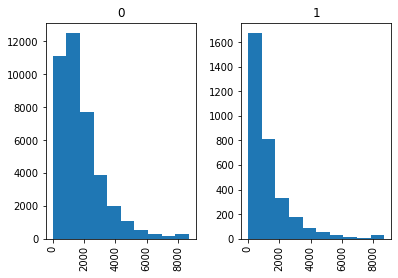

In [29]:
df['urineoutput_apache'].hist(bins = 10, by=df['hospital_death'])

# 800 - 2000

array([<matplotlib.axes._subplots.AxesSubplot object at 0x1a39a68b00>,
      dtype=object)

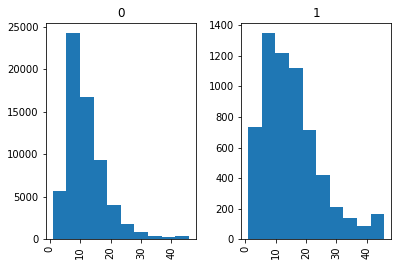

In [32]:
df['wbc_apache'].hist(bins = 10, by=df['hospital_death'])

In [64]:
df.shape

(91713, 186)

array([<matplotlib.axes._subplots.AxesSubplot object at 0x1a39542278>,
      dtype=object)

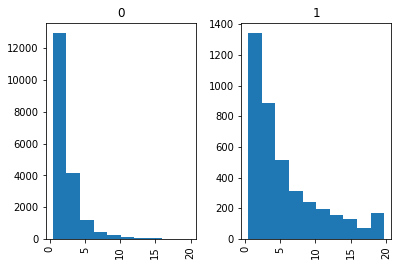

In [75]:
df['d1_lactate_max'].hist(bins = 10, by=df['hospital_death'])

array([<matplotlib.axes._subplots.AxesSubplot object at 0x1a3a0e4a20>,
      dtype=object)

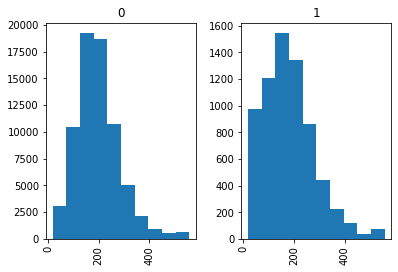

In [78]:
df['d1_platelets_min'].hist(bins = 10, by=df['hospital_death'])

## FEATURE ENGINEERING

In [76]:
def urine_flag(df):
    '''
    Creates 1 for patients with less than 800 mL of urine output in the first 24 hours
    0 Otherwise

    Parameters:
    -----------------------------
    df                pd.DataFrame

    Return:
    -----------------------------
    low_urine         pd.Series

    '''
    bins = [0, 800, np.inf]
    names = [1, 0]
    
    low_urine = pd.cut(df['urineoutput_apache'], bins, labels=names, include_lowest = True)
    return pd.Series(low_urine)

In [77]:
df["urine"] = urine_flag(df)

In [78]:
def wbc_level(df):
    '''
    Creates three levels for different levels of White Blood Cells
    Level = 0 --> wbc <10
    Level = 1 --> 10 <= wbc <s10
    Level = 2 --> 30 <= wbc

    Parameters:
    -----------------------------
    df                pd.DataFrame

    Return:
    -----------------------------
    wbc_level         pd.Series

    '''
    bins = [0, 10, 30, np.inf]
    names = [0, 1, 2]
    
    wbc_level = pd.cut(df['wbc_apache'], bins, labels=names, include_lowest = True)
    return pd.Series(wbc_level)

In [79]:
df["wbc"] = wbc_level(df)

In [80]:
df.wbc.value_counts(dropna = False)

1.0    34897
0.0    33019
NaN    22012
2.0     1785
Name: wbc, dtype: int64

In [81]:
def lactate_level(df):
    '''
    Creates 1 for patients with lactate greater than 2.2 in the first 24 hours
    0 Otherwise
    
    Used d1_lactate_max as a more conservative measure

    Parameters:
    -----------------------------
    df                pd.DataFrame

    Return:
    -----------------------------
    lactate_level       pd.Series

    '''
    bins = [0, 2.2, np.inf]
    names = [1, 0]
    
    lactate_level = pd.cut(df['d1_lactate_max'], bins, labels=names, include_lowest = True)
    return pd.Series(lactate_level)

In [82]:
df["lac"] = lactate_level(df)

In [83]:
df.lac.value_counts(dropna = False)

NaN    68396
1.0    13798
0.0     9519
Name: lac, dtype: int64

In [84]:
def platelets_level(df):
    '''
    Creates 1 for patients with platelets less than 100 in the first 24 hours
    0 Otherwise
    
    Used d1_plateslets_min as a more conservative measure

    Parameters:
    -----------------------------
    df                pd.DataFrame

    Return:
    -----------------------------
    platelets_level    pd.Series

    '''
    bins = [0, 100, np.inf]
    names = [1, 0]
    
    platelets_level = pd.cut(df['d1_platelets_min'], bins, labels=names, include_lowest = True)
    return pd.Series(platelets_level)

In [85]:
df["plate"] = platelets_level(df)

In [86]:
df.plate.value_counts(dropna = False)

0.0    69560
NaN    13444
1.0     8709
Name: plate, dtype: int64

In [87]:
def grab_main_cat(col):
    """
    Return the main category for apache diagnosis. (apache_3j_diagnosis and apache_2_diagnosis)

    Parameters
    -------------------
    col                 pd.Series
                        The variables we want to extract the main category.

    Return
    -------------------
    output              pd.Series
                        Main categories of diagnosis. 

    """
    output = col.astype('str').str.split('.', n=1, expand=True)[0]
    output = output.astype(str)
    output = output.replace('nan', '000')
    
    return output

In [88]:
df["f_apache_3j_diagnosis"] = grab_main_cat(df["apache_3j_diagnosis"])
df["f_apache_2_diagnosis"] = grab_main_cat(df["apache_2_diagnosis"])

In [89]:
new_vars = ["plate", "lac", "wbc", "urine", "f_apache_3j_diagnosis", "f_apache_2_diagnosis", 
            "age", "bmi", "elective_surgery", "gender", "height", "icu_stay_type", 
            "hospital_admit_source", "weight", "apache_4a_hospital_death_prob", "apache_4a_icu_death_prob"]

In [90]:
n = df[new_vars]
null_values(n)

Dataframe has 16 columns.
There are 10 columns that have missing values.


,Missing Values,% of Total Values
lac,68396,74.6
urine,48998,53.4
wbc,22012,24.0
hospital_admit_source,21409,23.3
plate,13444,14.7
age,4228,4.6
bmi,3429,3.7
weight,2720,3.0
height,1334,1.5
gender,25,0.0


In [37]:
n.gender.unique()

array(['M', 'F', nan], dtype=object)

In [35]:
n['hospital_admit_source'] = n['hospital_admit_source'].fillna("Unknown")
n['age'] = n['age'].fillna(n['age'].median())
n['bmi'] = n['bmi'].fillna(n['bmi'].median())
n['weight'] = n['weight'].fillna(n['weight'].median())
n['height'] = n['height'].fillna(n['height'].median())
n['gender'] = n['gender'].fillna("")
n['apache_4a_hospital_death_prob'] = n['apache_4a_hospital_death_prob'].fillna(-1)
n['apache_4a_icu_death_prob'] = n['apache_4a_icu_death_prob'].fillna(-1)

/Users/meghnadiwan/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/Users/meghnadiwan/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/Users/meghnadiwan/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_inde

In [38]:
n.f_apache_3j_diagnosis.unique()

array(['502', '203', '703', '1206', '601', '403', '501', '103', '107',
       '1304', '1505', '1406', '109', '410', '1506', '1703', '305',
       '1204', '1602', '104', '1302', '108', '212', '106', '407', '0',
       '1205', '1502', '102', '206', '306', '1207', '207', '111', '1403',
       '1504', '405', '1203', '802', '208', '402', '211', '1902', '309',
       '110', '409', '1401', '702', '1405', '1904', '408', '1101', '1601',
       '311', '1208', '901', '1212', '1903', '301', '1410', '401', '1705',
       '105', '209', '308', '602', '704', '1503', '1701', '1408', '307',
       '801', '902', '000', '312', '1501', '1303', '604', '1803', '1801',
       '1409', '1102', '1404', '1202', '204', '1210', '1301', '1802',
       '101', '1209', '605', '1211', '1413', '213', '1407', '2201', '201',
       '1704', '313', '310', '701', '406', '303', '404', '202', '1411',
       '1604', '1605', '2101', '1412', '603', '903', '210'], dtype=object)

In [95]:
x = n[["f_apache_3j_diagnosis", "f_apache_2_diagnosis", "age", "bmi", "elective_surgery", 
       "gender", "height", "icu_stay_type", "hospital_admit_source", "weight", 
       "apache_4a_hospital_death_prob", "apache_4a_icu_death_prob"]]
x = pd.get_dummies(x)
col = "lac"
test_y = n[n[col].isnull()][col]
train_y = n[n[col].notna()][col]
train_x, test_x = train_test_split(x, test_size= n[col].isnull().sum() / n.shape[0])

In [38]:
from sklearn.model_selection import cross_val_score
knn = KNeighborsClassifier(n_neighbors = 1, n_jobs=-1, weights='distance') 
scores = cross_val_score(knn, train_x, train_y, cv=10, scoring = "accuracy")
print("Scores:", scores)
print("Mean:", scores.mean())
print("Standard Deviation:", scores.std())

Scores: [0.53087479 0.50171527 0.50943396 0.52830189 0.51200686 0.50943396
 0.50643225 0.53816467 0.5045045  0.53004292]
Mean: 0.5170911059323078
Standard Deviation: 0.012566142228667799


In [39]:
train_y.value_counts(normalize=True)

1    0.591757
0    0.408243
Name: lac, dtype: float64

In [345]:
def var_knn_pred(var):
    x = n[["f_apache_3j_diagnosis", "f_apache_2_diagnosis", "age", "bmi", "elective_surgery", 
       "gender", "height", "icu_stay_type", "hospital_admit_source", "weight"]]
    x = pd.get_dummies(x)
    test_y = n[n[var].isnull()][var]
    train_y = n[n[var].notna()][var]
    train_x, test_x = train_test_split(x, test_size= n[var].isnull().sum() / n.shape[0])
    
    knn = KNeighborsClassifier(n_neighbors = 1, n_jobs=-1, weights='distance') 
    knn.fit(train_x, train_y)  
    p = pd.DataFrame()
    p[var] = knn.predict(test_x) 
    print("var:", var, ", Train Accuracy:", round(knn.score(train_x, train_y) * 100, 2), "%")
    return(p)

#["plate", "lac", "wbc", "urine"]

In [346]:
lac_pred = var_knn_pred("lac")

var: lac , Train Accuracy: 99.98 %


In [102]:
# create training and testing vars
train_x, test_x, train_y, test_y = train_test_split(df1, y, test_size=0.2)
print(train_x.shape, train_y.shape)
print(test_x.shape, test_y.shape)

(73370, 53) (73370,)
(18343, 53) (18343,)


In [103]:
# Use LightGBM to predict age 
import lightgbm as lgb
from sklearn.metrics import mean_squared_error

# Create lgb dataset
lgb_train = lgb.Dataset(train_x, train_y)
lgb_eval = lgb.Dataset(test_x, test_y, reference=lgb_train)

# specify your configurations as a dict
params = {}
params['max_bin'] = 10
params['learning_rate'] = 0.1 # shrinkage_rate
params['boosting_type'] = 'gbdt'
params['objective'] = 'regression'
params['metric'] = 'mae'          # or 'mae'
params['sub_feature'] = 0.50      # feature_fraction 
params['bagging_fraction'] = 0.85 # sub_row
params['bagging_freq'] = 40
params['num_leaves'] = 600        # num_leaf
params['min_data'] = 500          # min_data_in_leaf
params['min_hessian'] = 0.05      # min_sum_hessian_in_leaf
params['verbose'] = 0
params['early_stopping_round'] = 5

print('Starting training...')
# train
gbm = lgb.train(params,
                train_set = lgb_train,
                num_boost_round =20,
                valid_sets=lgb_eval)

print('Saving model...')
# save model to file
gbm.save_model('model.txt')

print('Starting predicting...')
# predict
y_pred = gbm.predict(test_x, num_iteration=gbm.best_iteration)
# eval
print('The rmse of prediction is:', mean_squared_error(test_y, y_pred) ** 0.5)

Starting training...


/Users/meghnadiwan/anaconda3/lib/python3.7/site-packages/lightgbm/engine.py:153: UserWarning: Found `early_stopping_round` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))


[1]	valid_0's l1: 0.154403
Training until validation scores don't improve for 5 rounds
[2]	valid_0's l1: 0.153441
[3]	valid_0's l1: 0.150513
[4]	valid_0's l1: 0.149667
[5]	valid_0's l1: 0.147169
[6]	valid_0's l1: 0.144879
[7]	valid_0's l1: 0.142793
[8]	valid_0's l1: 0.142246
[9]	valid_0's l1: 0.140499
[10]	valid_0's l1: 0.139942
[11]	valid_0's l1: 0.138282
[12]	valid_0's l1: 0.136769
[13]	valid_0's l1: 0.13541
[14]	valid_0's l1: 0.134185
[15]	valid_0's l1: 0.133132
[16]	valid_0's l1: 0.132085
[17]	valid_0's l1: 0.131795
[18]	valid_0's l1: 0.130914
[19]	valid_0's l1: 0.130107
[20]	valid_0's l1: 0.129416
Did not meet early stopping. Best iteration is:
[20]	valid_0's l1: 0.129416
Saving model...
Starting predicting...
The rmse of prediction is: 0.24907980974129382
